In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df0 = pd.read_csv('berkeley_global_temperatures.csv')
df0.head()

Year  Month  Monthly_Anomaly
0  1850      1           -0.753
1  1850      2           -0.202
2  1850      3           -0.367
3  1850      4           -0.596
4  1850      5           -0.619

In [3]:
df0.shape

(4200, 3)

In [4]:
df0 = df0[:2100]
df0.shape

(2100, 3)

In [5]:

# Assuming df already contains Year, Month, and Monthly_Anomaly columns

# Step 1: Add 'Day' column with value 1 (first day of each month)
df0['Day'] = 1

# Step 2: Convert to datetime format
df0['Date'] = pd.to_datetime(df0[['Year', 'Month', 'Day']])

# Optional: Set Date as index for time series work
df0.set_index('Date', inplace=True)



In [6]:
df0

Year  Month  Monthly_Anomaly  Day
Date                                         
1850-01-01  1850      1           -0.753    1
1850-02-01  1850      2           -0.202    1
1850-03-01  1850      3           -0.367    1
1850-04-01  1850      4           -0.596    1
1850-05-01  1850      5           -0.619    1
...          ...    ...              ...  ...
2024-08-01  2024      8            1.383    1
2024-09-01  2024      9            1.271    1
2024-10-01  2024     10            1.368    1
2024-11-01  2024     11            1.313    1
2024-12-01  2024     12            1.289    1

[2100 rows x 4 columns]

In [7]:
df0 = df0[:2075]
df0

Year  Month  Monthly_Anomaly  Day
Date                                         
1850-01-01  1850      1           -0.753    1
1850-02-01  1850      2           -0.202    1
1850-03-01  1850      3           -0.367    1
1850-04-01  1850      4           -0.596    1
1850-05-01  1850      5           -0.619    1
...          ...    ...              ...  ...
2022-07-01  2022      7            0.925    1
2022-08-01  2022      8            0.976    1
2022-09-01  2022      9            0.919    1
2022-10-01  2022     10            1.041    1
2022-11-01  2022     11            0.730    1

[2075 rows x 4 columns]

In [8]:
df0 = df0[['Monthly_Anomaly']]
df0 = df0.asfreq('MS')

In [9]:
df0.head()

Monthly_Anomaly
Date                       
1850-01-01           -0.753
1850-02-01           -0.202
1850-03-01           -0.367
1850-04-01           -0.596
1850-05-01           -0.619

In [10]:
df0.shape

(2075, 1)

In [11]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075 entries, 1850-01-01 to 2022-11-01
Freq: MS
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Monthly_Anomaly  2075 non-null   float64
dtypes: float64(1)
memory usage: 32.4 KB


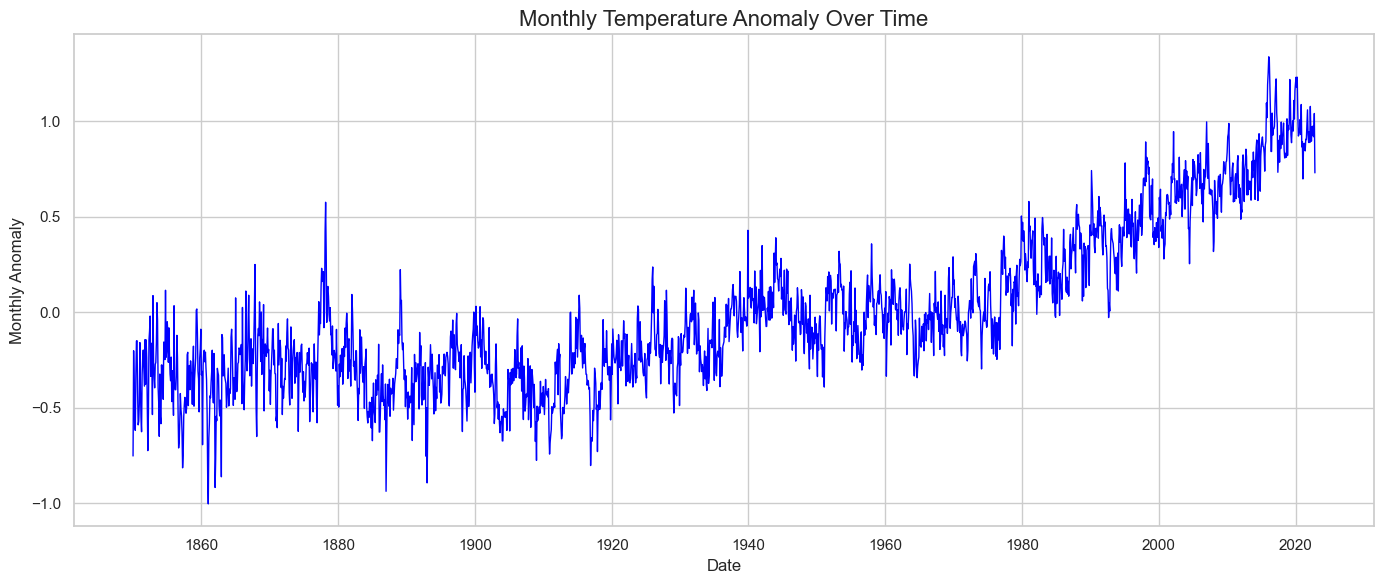

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df0.index, df0['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
!pip install ruptures

Defaulting to user installation because normal site-packages is not writeable


# Method 1 : CUMSUM Method

🔹 CUSUM (via Binseg) Change Point Indices: [1035, 1555, 1820, 2075]
🔹 CUSUM Change Point Dates:
Index: 1035, Date: 1936-04
Index: 1555, Date: 1979-08
Index: 1820, Date: 2001-09


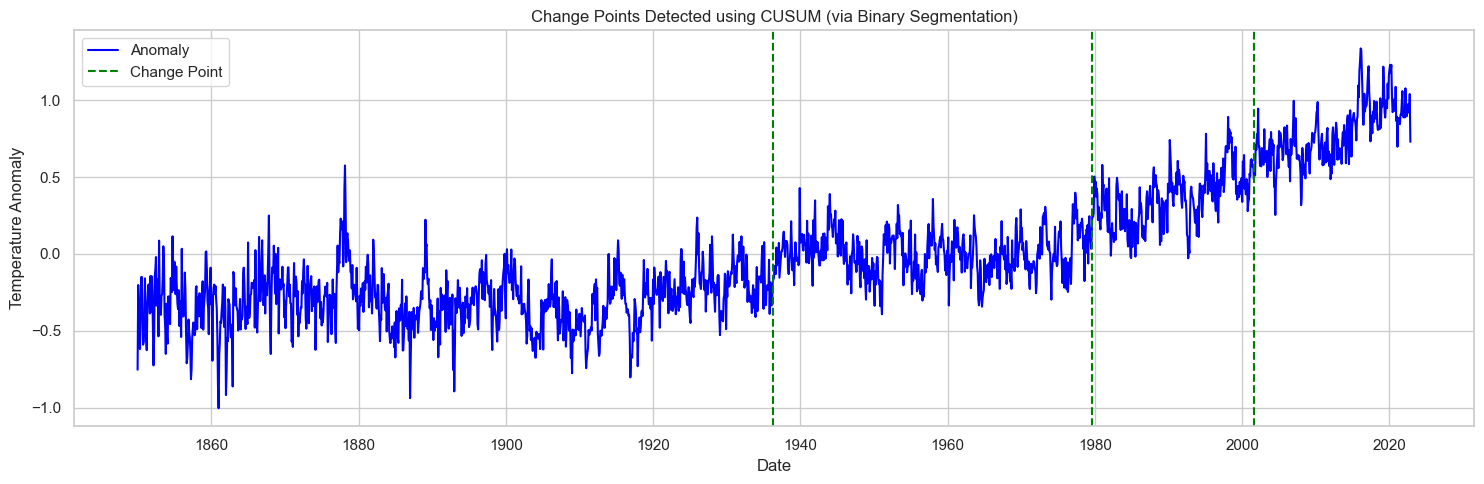

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Step 1: Extract signal and date index
signal = df0['Monthly_Anomaly'].values
dates = df0.index

# Step 2: Fit the Binary Segmentation (CUSUM-based) model
model_cusum = rpt.Binseg(model="l2").fit(signal)

# Step 3: Predict change points
result_cusum = model_cusum.predict(pen=10)

# Step 4: Print change point indices and their corresponding dates
print("🔹 CUSUM (via Binseg) Change Point Indices:", result_cusum)
print("🔹 CUSUM Change Point Dates:")
for cp in result_cusum[:-1]:  # exclude the last index
    print(f"Index: {cp}, Date: {dates[cp].strftime('%Y-%m')}")

# Step 5: Plot results
plt.figure(figsize=(15, 5))
plt.plot(dates, signal, label='Temperature Anomaly', color='blue')
for cp in result_cusum[:-1]:
    plt.axvline(dates[cp], color='green', linestyle='--')
plt.title("Change Points Detected using CUSUM (via Binary Segmentation)")
plt.xlabel("Date")
plt.ylabel("Temperature Anomaly")
plt.legend(["Anomaly", "Change Point"])
plt.grid(True)
plt.tight_layout()
plt.show()



# Method 2: Pruned Exact Linear Time(PELT)

🔹 PELT Change Point Indices: [825, 1040, 1525, 1645, 1815, 1975, 2075]
🔹 PELT Change Point Dates:
Index: 825, Date: 1918-10
Index: 1040, Date: 1936-09
Index: 1525, Date: 1977-02
Index: 1645, Date: 1987-02
Index: 1815, Date: 2001-04
Index: 1975, Date: 2014-08


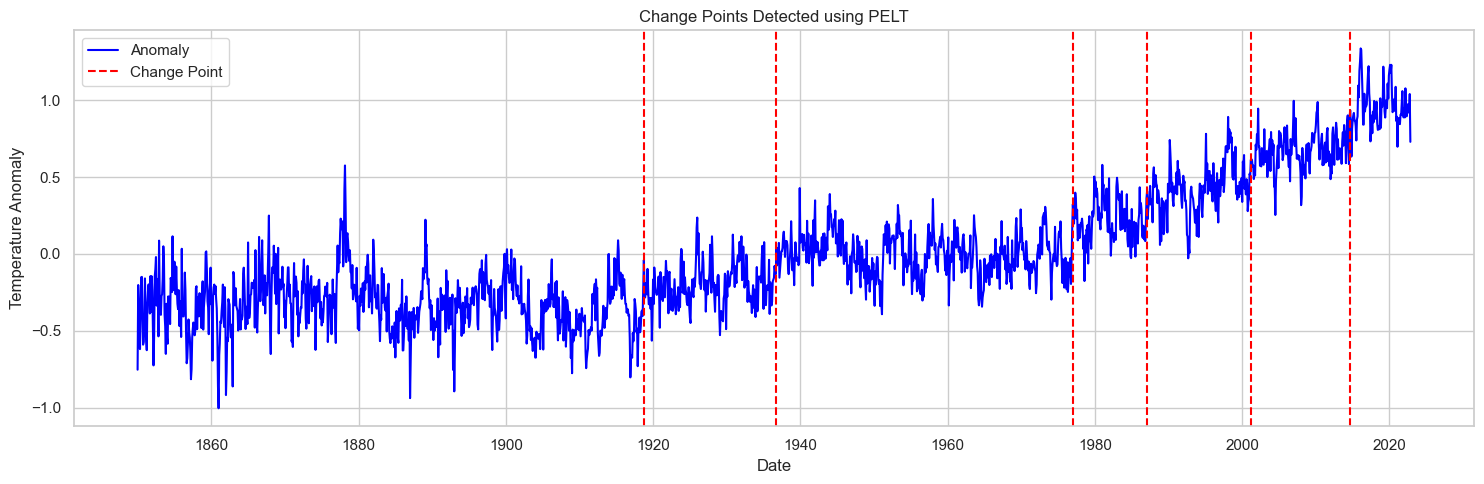

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Step 1: Extract signal and date index
signal = df0['Monthly_Anomaly'].values
dates = df0.index  # Date is the index here

# Step 2: Fit the PELT model
model_pelt = rpt.Pelt(model="rbf").fit(signal)

# Step 3: Predict change points
result_pelt = model_pelt.predict(pen=10)

# Step 4: Print change point indices and their corresponding dates
print("🔹 PELT Change Point Indices:", result_pelt)
print("🔹 PELT Change Point Dates:")
for cp in result_pelt[:-1]:  # exclude last (end of series)
    print(f"Index: {cp}, Date: {dates[cp].strftime('%Y-%m')}")

# Step 5: Plot with vertical lines
plt.figure(figsize=(15, 5))
plt.plot(dates, signal, label='Temperature Anomaly', color='blue')
for cp in result_pelt[:-1]:
    plt.axvline(dates[cp], color='red', linestyle='--')
plt.title("Change Points Detected using PELT")
plt.xlabel("Date")
plt.ylabel("Temperature Anomaly")
plt.legend(["Anomaly", "Change Point"])
plt.grid(True)
plt.tight_layout()
plt.show()


In [16]:
from scipy.stats import ttest_ind

# Step 1: Add start (0) to the list of change points
change_points = [0] + result_pelt

print("📊 Confirming Change Points by Mean Difference & Welch’s t-test\n")

# Step 2: Loop through each adjacent segment pair
for i in range(len(change_points) - 2):
    start1 = change_points[i]
    end1 = change_points[i + 1]
    start2 = change_points[i + 1]
    end2 = change_points[i + 2]

    segment1 = signal[start1:end1]
    segment2 = signal[start2:end2]

    mean1 = segment1.mean()
    mean2 = segment2.mean()
    mean_diff = mean2 - mean1

    # Perform Welch's t-test
    t_stat, p_value = ttest_ind(segment1, segment2, equal_var=False)

    # Print results
    print(f"🔹 Between Segment {i+1} and {i+2}:")
    print(f"    ➤ Segment 1: {dates[start1].strftime('%Y-%m')} to {dates[end1-1].strftime('%Y-%m')}")
    print(f"    ➤ Segment 2: {dates[start2].strftime('%Y-%m')} to {dates[end2-1].strftime('%Y-%m')}")
    print(f"    ➤ Mean 1 = {mean1:.4f}, Mean 2 = {mean2:.4f}")
    print(f"    ➤ Mean Difference = {mean_diff:.4f}")
    print(f"    ➤ p-value = {p_value:.5f} → {'✅ Significant' if p_value < 0.05 else '❌ Not Significant'}\n")


📊 Confirming Change Points by Mean Difference & Welch’s t-test

🔹 Between Segment 1 and 2:
    ➤ Segment 1: 1850-01 to 1918-09
    ➤ Segment 2: 1918-10 to 1936-08
    ➤ Mean 1 = -0.3272, Mean 2 = -0.2021
    ➤ Mean Difference = 0.1251
    ➤ p-value = 0.00000 → ✅ Significant

🔹 Between Segment 2 and 3:
    ➤ Segment 1: 1918-10 to 1936-08
    ➤ Segment 2: 1936-09 to 1977-01
    ➤ Mean 1 = -0.2021, Mean 2 = -0.0051
    ➤ Mean Difference = 0.1970
    ➤ p-value = 0.00000 → ✅ Significant

🔹 Between Segment 3 and 4:
    ➤ Segment 1: 1936-09 to 1977-01
    ➤ Segment 2: 1977-02 to 1987-01
    ➤ Mean 1 = -0.0051, Mean 2 = 0.2195
    ➤ Mean Difference = 0.2246
    ➤ p-value = 0.00000 → ✅ Significant

🔹 Between Segment 4 and 5:
    ➤ Segment 1: 1977-02 to 1987-01
    ➤ Segment 2: 1987-02 to 2001-03
    ➤ Mean 1 = 0.2195, Mean 2 = 0.4205
    ➤ Mean Difference = 0.2011
    ➤ p-value = 0.00000 → ✅ Significant

🔹 Between Segment 5 and 6:
    ➤ Segment 1: 1987-02 to 2001-03
    ➤ Segment 2: 2001-04 to 

# Method 3 : Binary Segmentation

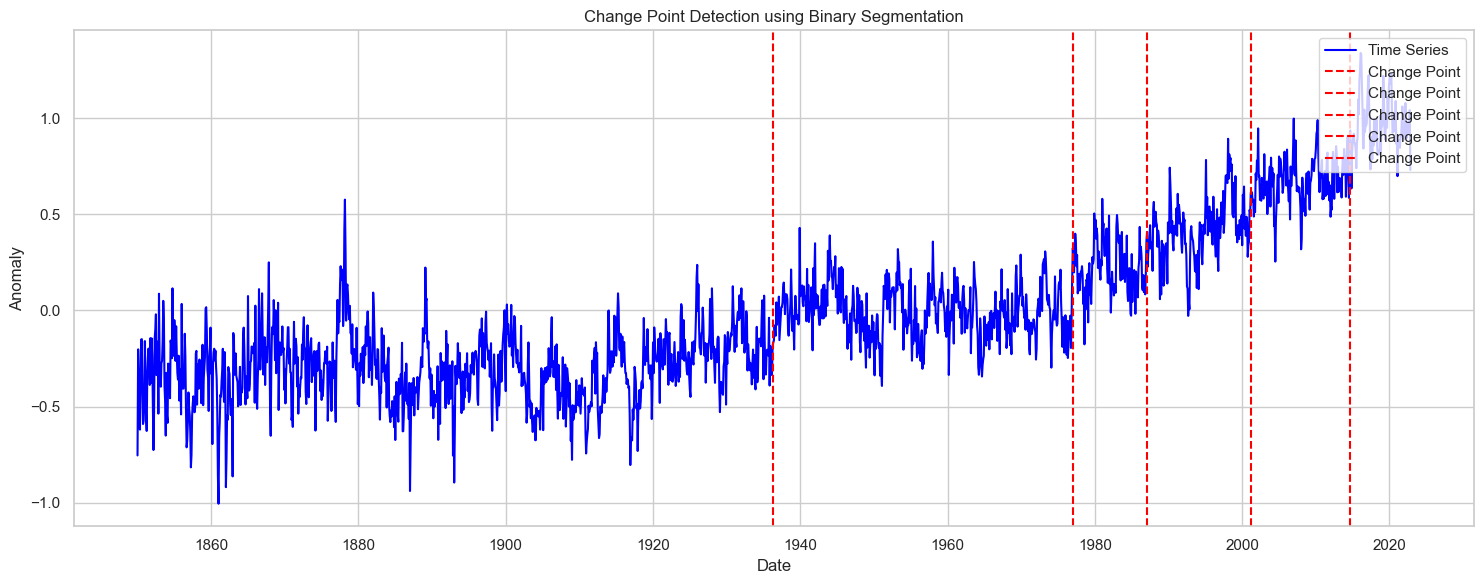

Detected Change Points (Dates):
Change Point 1: 1936-04-01 00:00:00
Change Point 2: 1977-02-01 00:00:00
Change Point 3: 1987-02-01 00:00:00
Change Point 4: 2001-04-01 00:00:00
Change Point 5: 2014-08-01 00:00:00


In [17]:
import ruptures as rpt
import pandas as pd
import matplotlib.pyplot as plt

# Use 'Anomaly' column for change point detection
signal = df0['Monthly_Anomaly'].values

# Binary Segmentation
model_binseg = rpt.Binseg(model="rbf").fit(signal)
n_bkps = 5  # Change this based on how many change points you want
result_binseg = model_binseg.predict(n_bkps=n_bkps)

# Convert indices to actual datetime index (excluding the end of series)
change_point_dates = df0.index[result_binseg[:-1]]

# 📊 Plotting
plt.figure(figsize=(15, 6))
plt.plot(df0.index, df0['Monthly_Anomaly'], label='Time Series', color='blue')
for cp in change_point_dates:
    plt.axvline(x=cp, color='red', linestyle='--', label='Change Point')

plt.title('Change Point Detection using Binary Segmentation')
plt.xlabel('Date')
plt.ylabel('Anomaly')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

# 📍 Print change point dates
print("Detected Change Points (Dates):")
for i, date in enumerate(change_point_dates):
    print(f"Change Point {i+1}: {date}")


# Method 4 : Bottom up Segmentation

Exact Change Point Indices: [1035, 1525, 1645, 1815, 1975]
Exact Change Point Dates:
1936-04-01 00:00:00
1977-02-01 00:00:00
1987-02-01 00:00:00
2001-04-01 00:00:00
2014-08-01 00:00:00


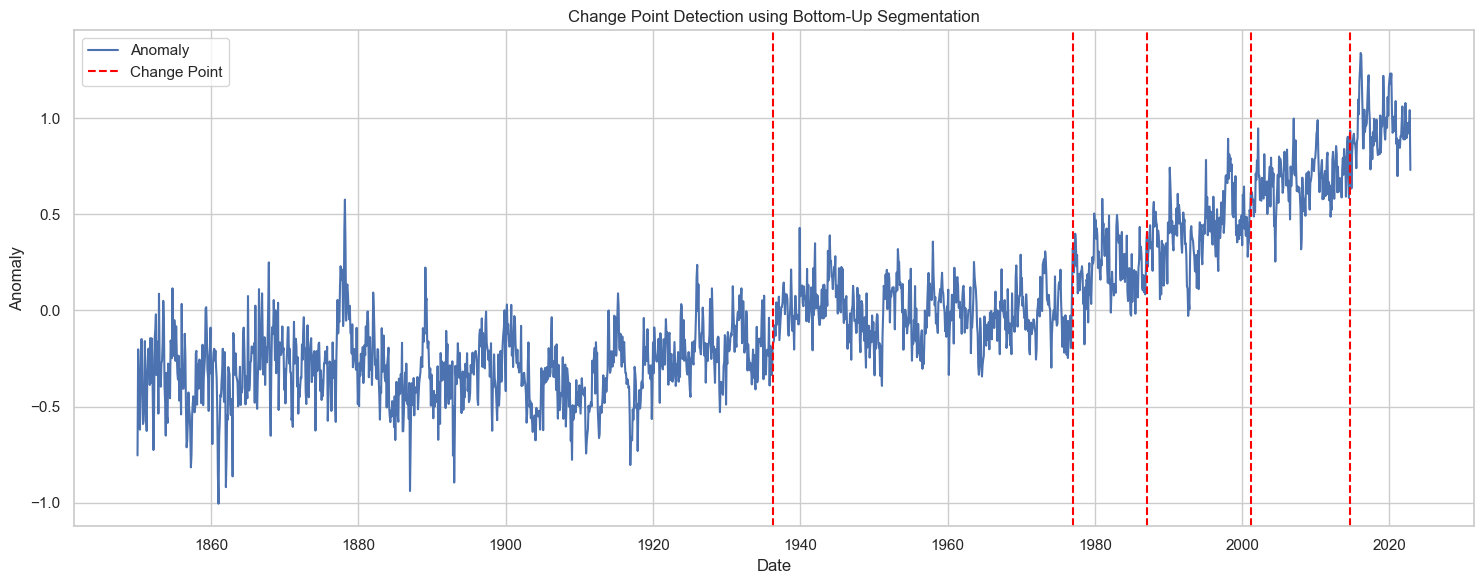

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import ruptures as rpt

# Step 1: Prepare the signal
signal = df0['Monthly_Anomaly'].values

# Step 2: Apply Bottom-Up segmentation
model = rpt.BottomUp(model="rbf", min_size=3).fit(signal)

# Step 3: Predict change points
n_bkps = 5  # You can tune this based on how many change points you expect
change_points = model.predict(n_bkps=n_bkps)

# Step 4: Remove the final point (end of the series)
exact_indices = change_points[:-1]
exact_dates = df0.index[exact_indices]

# Print the results
print("Exact Change Point Indices:", exact_indices)
print("Exact Change Point Dates:")
for date in exact_dates:
    print(date)

# Step 5: Plot the time series and the change points
plt.figure(figsize=(15, 6))
plt.plot(df0.index, df0['Monthly_Anomaly'], label='Anomaly')
for cp in exact_dates:
    plt.axvline(x=cp, color='red', linestyle='--', label='Change Point' if cp == exact_dates[0] else "")
plt.legend()
plt.title('Change Point Detection using Bottom-Up Segmentation')
plt.xlabel('Date')
plt.ylabel('Anomaly')
plt.grid(True)
plt.tight_layout()
plt.show()


# Dividing time series into homogenous parts(using Binary Segmentation) and applying Time series on the smaller smaller parts

In [19]:
df0.head()

Monthly_Anomaly
Date                       
1850-01-01           -0.753
1850-02-01           -0.202
1850-03-01           -0.367
1850-04-01           -0.596
1850-05-01           -0.619

In [20]:
df1 = df0[:1032]

In [21]:
df2 = df0[1032:1530]

In [22]:
df3 = df0[1530:1655]

In [23]:
df4 = df0[1655:1820]

In [24]:
df5 = df0[1820:1970]

In [25]:
df6 = df0[1970:]

In [26]:
df6.shape

(105, 1)

# df2

In [27]:
df = df2

In [28]:
df.shape

(498, 1)

In [29]:
df = df[:478]
df.shape

(478, 1)

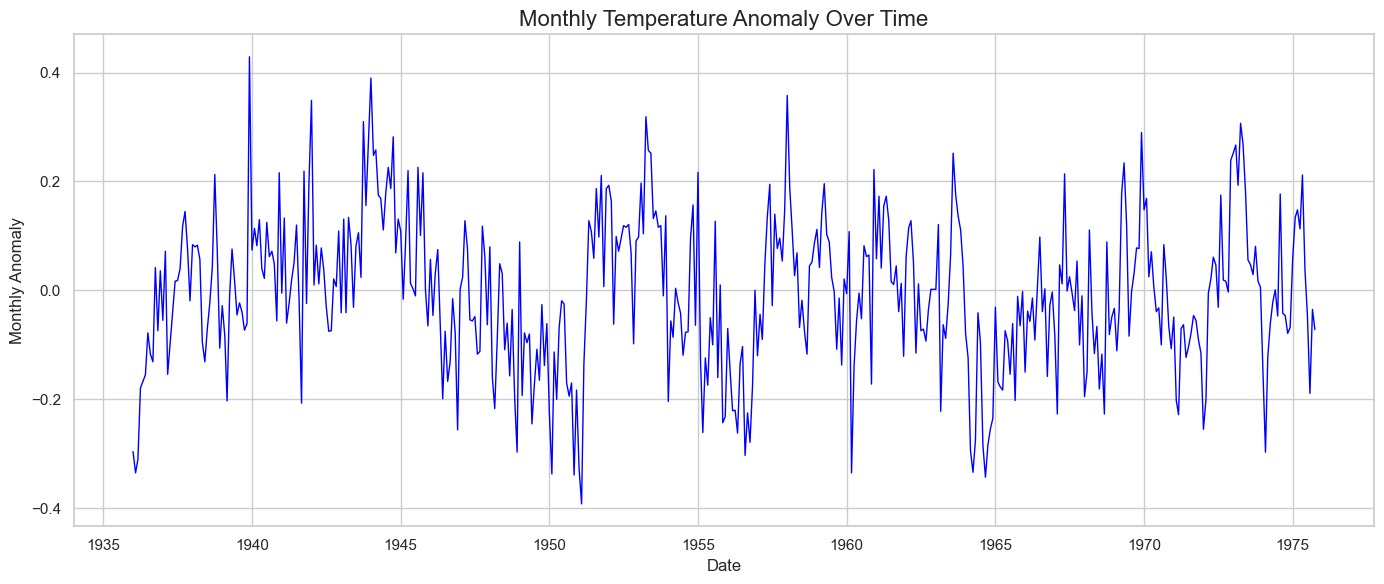

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


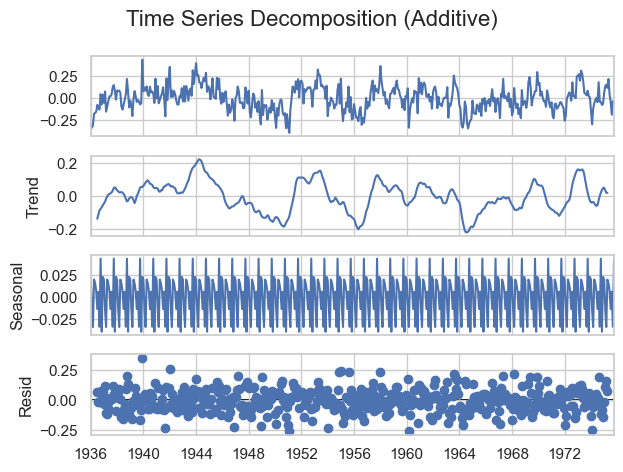

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
result = seasonal_decompose(df, model='additive', period=12)  # period=12 for monthly data (1 year)

# Plot the decomposition
result.plot()
plt.suptitle('Time Series Decomposition (Additive)', fontsize=16)
plt.tight_layout()
plt.show()

In [32]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram
import plotly.graph_objects as go

# ----- Replace this with your time series -----
# Assume your monthly time series is in a Pandas Series called `series`
series = df['Monthly_Anomaly']
series = series.dropna().values  # ensure no NaNs

# ----- Step 1: Compute periodogram -----
frequencies, power = periodogram(series)

# ----- Step 2: Convert frequency to period -----
nonzero_indices = frequencies > 0  # avoid division by zero
frequencies = frequencies[nonzero_indices]
power = power[nonzero_indices]
periods = 1 / frequencies

# ----- Step 3: Create a dataframe to find top periods -----
df_periods = pd.DataFrame({'Period': periods, 'Power': power})
df_top = df_periods.sort_values(by='Power', ascending=False).head(50)

# ----- Step 4: Plot with Plotly -----
fig = go.Figure()

fig.add_trace(go.Scatter(x=periods, y=power,
                         mode='lines',
                         name='Periodogram'))

# Mark top 5 seasonal periods
fig.add_trace(go.Scatter(x=df_top['Period'], y=df_top['Power'],
                         mode='markers+text',
                         text=[f"{p:.2f}" for p in df_top['Period']],
                         textposition='top center',
                         marker=dict(color='red', size=8),
                         name='Top 5 Peaks'))

fig.update_layout(title='Periodogram - Seasonality Detection',
                  xaxis_title='Period (in time steps)',
                  yaxis_title='Spectral Power',
                  template='plotly_white')

fig.show()

# ----- Step 5: Print top 5 periods -----
print("Top 5 Seasonality Periods (in time steps):")
print(df_top[['Period', 'Power']])

Top 5 Seasonality Periods (in time steps):
         Period     Power
4     95.600000  0.514077
7     59.750000  0.481305
3    119.500000  0.432908
2    159.333333  0.387197
19    23.900000  0.386235
10    43.454545  0.369717
5     79.666667  0.317033
13    34.142857  0.289641
1    239.000000  0.194589
8     53.111111  0.194287
0    478.000000  0.190073
16    28.117647  0.158222
54     8.690909  0.144233
25    18.384615  0.141556
12    36.769231  0.122766
20    22.761905  0.119882
17    26.555556  0.116535
26    17.703704  0.115105
21    21.727273  0.112065
9     47.800000  0.111975
6     68.285714  0.109014
36    12.918919  0.103074
37    12.578947  0.096788
50     9.372549  0.091624
15    29.875000  0.089826
238    2.000000  0.087711
186    2.556150  0.079262
203    2.343137  0.075263
98     4.828283  0.074309
68     6.927536  0.071697
41    11.380952  0.071152
80     5.901235  0.066984
46    10.170213  0.064423
34    13.657143  0.063588
84     5.623529  0.059662
158    3.006289  0.05

In [33]:
from statsmodels.tsa.stattools import adfuller

# Suppose your series is called 'Monthly_Anomaly'
# Replace with your actual pandas Series name
result = adfuller(df['Monthly_Anomaly'].dropna())

# Extracting results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

# Printing results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic      : {adf_statistic}")
print(f"p-value            : {p_value}")
print(f"Number of lags     : {used_lag}")
print(f"Number of obs used : {n_obs}")
print("Critical Values    :")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Stationarity decision
if p_value < 0.05:
    print("\n✅ The series is likely **stationary** (reject null hypothesis).")
else:
    print("\n❌ The series is likely **non-stationary** (fail to reject null hypothesis).")


Augmented Dickey-Fuller Test Results:
ADF Statistic      : -7.741753975847825
p-value            : 1.0573767500857348e-11
Number of lags     : 1
Number of obs used : 476
Critical Values    :
   1%: -3.444162847239118
   5%: -2.8676311169658177
   10%: -2.5700143303792107

✅ The series is likely **stationary** (reject null hypothesis).


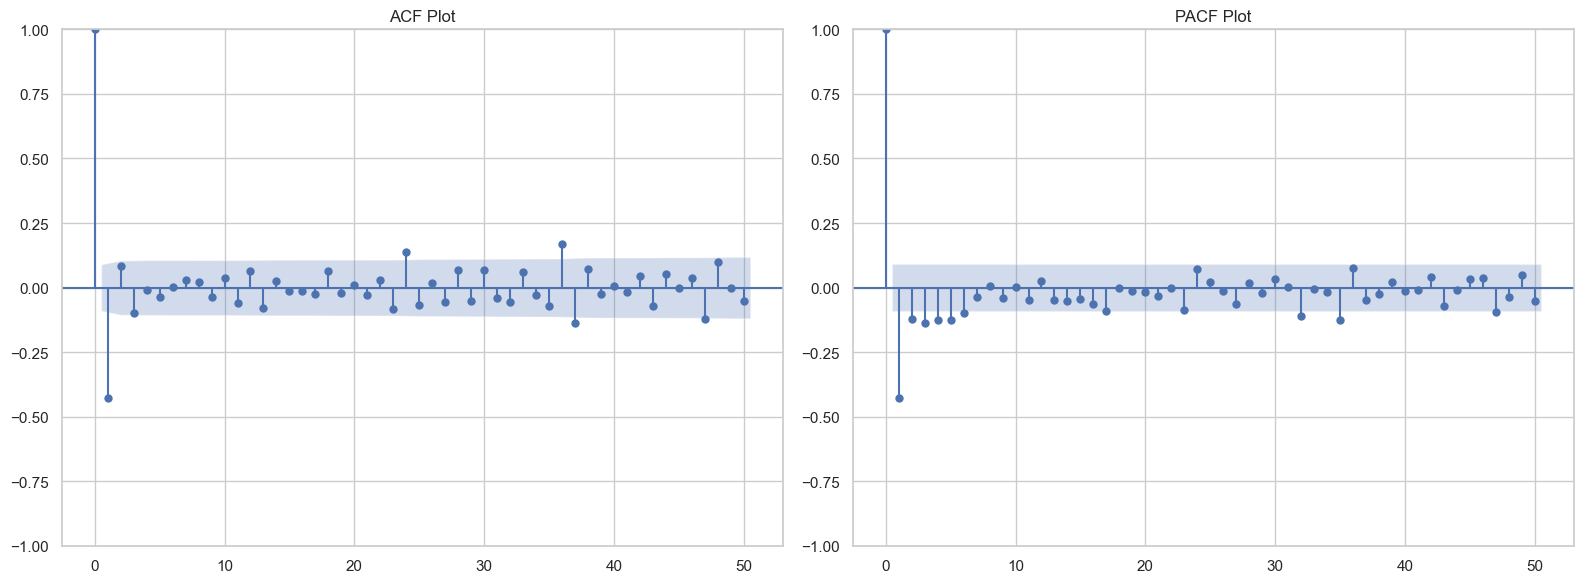

In [34]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use the original or differenced series
series = df['Monthly_Anomaly'].diff().dropna()  # Use differenced if original was non-stationary

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(series, ax=axes[0], lags=50, title='ACF Plot')
plot_pacf(series, ax=axes[1], lags=50, title='PACF Plot', method='ywm')

plt.tight_layout()
plt.show()

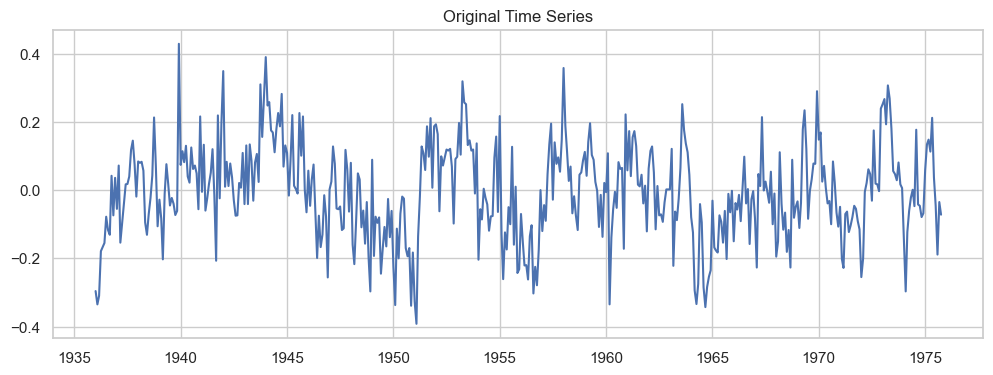

ADF Test on Original Series:
ADF Statistic: -7.741753975847825
p-value      : 1.0573767500857348e-11
✅ The series is likely Stationary


<Figure size 1000x400 with 0 Axes>

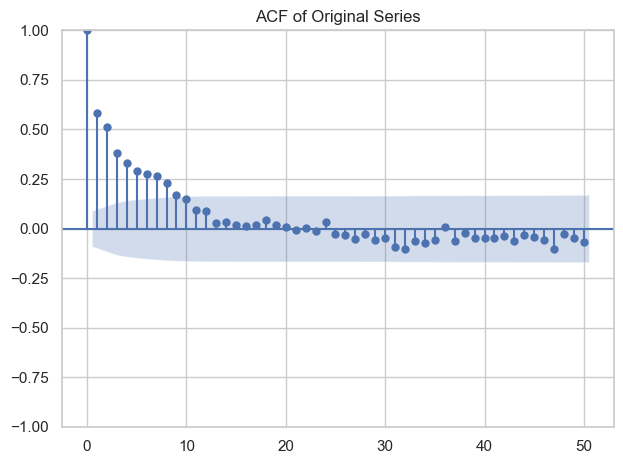


ADF Test on First-Differenced Series:
ADF Statistic: -13.11178624905786
p-value      : 1.6291974572691827e-24
✅ The differenced series is Stationary


<Figure size 1000x400 with 0 Axes>

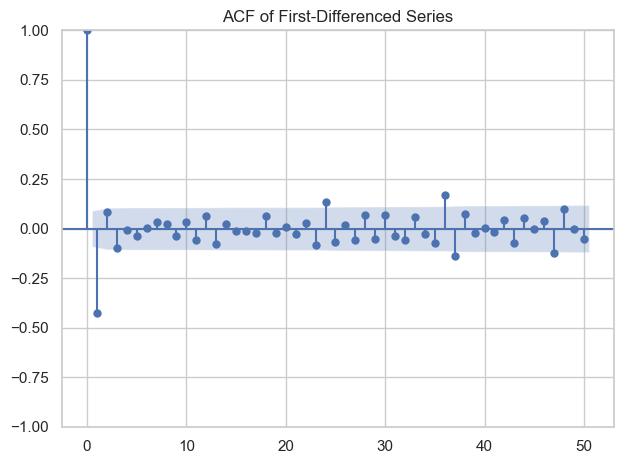


🔍 FINAL CONCLUSION:
❌ Your time series does not exhibit the characteristics of a pure Random Walk.


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# --- STEP 1: Load your time series ---
series = df['Monthly_Anomaly'].dropna()

# --- STEP 2: Plot original series ---
plt.figure(figsize=(12, 4))
plt.plot(series)
plt.title("Original Time Series")
plt.grid(True)
plt.show()

# --- STEP 3: ADF Test on original series ---
adf_result = adfuller(series)
adf_stat_orig = adf_result[0]
p_val_orig = adf_result[1]

print("ADF Test on Original Series:")
print(f"ADF Statistic: {adf_stat_orig}")
print(f"p-value      : {p_val_orig}")
if p_val_orig > 0.05:
    print("❌ The series is likely Non-Stationary (could be a Random Walk)")
else:
    print("✅ The series is likely Stationary")

# --- STEP 4: Plot ACF of original series ---
plt.figure(figsize=(10, 4))
plot_acf(series, lags=50)
plt.title("ACF of Original Series")
plt.tight_layout()
plt.show()

# --- STEP 5: First differencing ---
diff_series = series.diff().dropna()

# --- STEP 6: ADF Test on differenced series ---
adf_diff_result = adfuller(diff_series)
adf_stat_diff = adf_diff_result[0]
p_val_diff = adf_diff_result[1]

print("\nADF Test on First-Differenced Series:")
print(f"ADF Statistic: {adf_stat_diff}")
print(f"p-value      : {p_val_diff}")
if p_val_diff < 0.05:
    print("✅ The differenced series is Stationary")
else:
    print("❌ The differenced series is still Non-Stationary")

# --- STEP 7: Plot ACF of differenced series ---
plt.figure(figsize=(10, 4))
plot_acf(diff_series, lags=50)
plt.title("ACF of First-Differenced Series")
plt.tight_layout()
plt.show()

# --- FINAL CONCLUSION ---
print("\n🔍 FINAL CONCLUSION:")
if p_val_orig > 0.05 and p_val_diff < 0.05:
    print("✅ Based on ADF tests and visual inspection, your time series is likely a **Random Walk**.")
else:
    print("❌ Your time series does not exhibit the characteristics of a pure Random Walk.")

In [36]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import itertools

warnings.filterwarnings("ignore")

# Assuming your original data is in `df['Temperature']`
y = df['Monthly_Anomaly']

# Define parameter range
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Create all combinations
pdq = list(itertools.product(p, d, q))

# Track best model
best_aic = np.inf
best_order = None
results = []

for order in pdq:
    try:
        model = ARIMA(y, order=order)
        result = model.fit()
        results.append({'order': order, 'aic': result.aic})
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
    except:
        continue

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).sort_values(by='aic')

# Show best model
print("Best ARIMA order:", best_order)
print("Lowest AIC:", best_aic)
results_df.head()

Best ARIMA order: (2, 0, 0)
Lowest AIC: -758.2360168124976


order         aic
16  (2, 0, 0) -758.236017
11  (1, 0, 3) -757.873177
25  (3, 0, 1) -756.580214
9   (1, 0, 1) -756.446709
17  (2, 0, 1) -756.405049

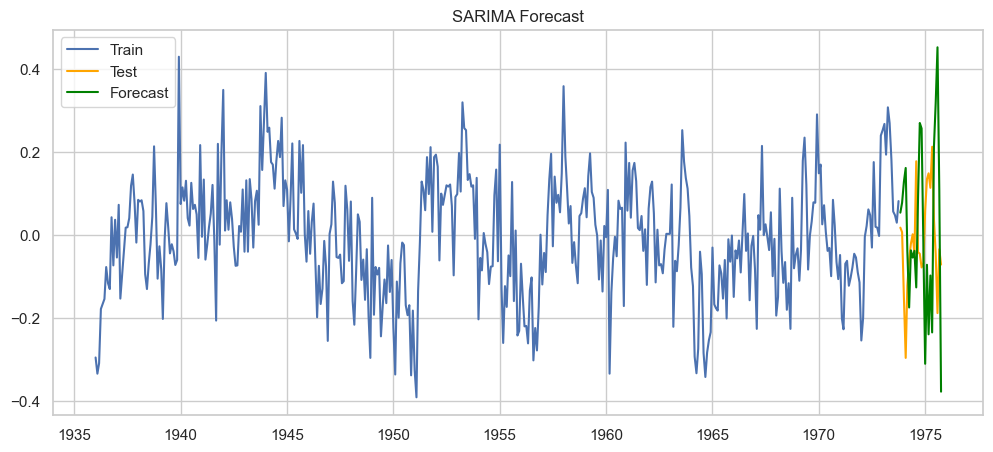

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df

# Step 2: Train-test split (90%-10%)
train_size = int(len(df) * 0.95)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model2 = SARIMAX(train,
                order=(2, 0, 1),
                seasonal_order=(5, 4, 2 , 9),
                enforce_stationarity=False,
                enforce_invertibility=False)

result2 = model2.fit(disp=False)

# Step 4: Forecast
forecast = result2.forecast(steps=len(test))

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

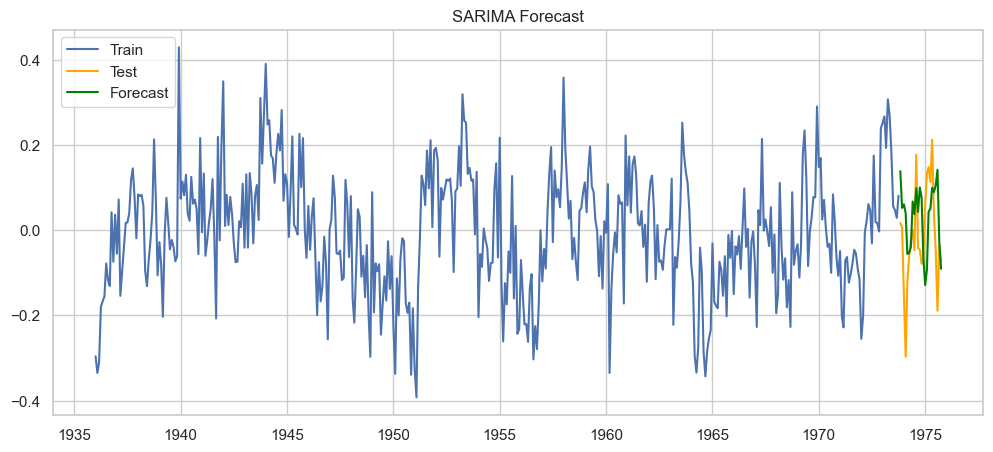

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df

# Step 2: Train-test split (90%-10%)
train_size = int(len(df) * 0.95)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model = SARIMAX(train,
                order=(2, 0, 1),
                seasonal_order=(5, 3, 2 , 9),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Step 4: Forecast
forecast = results.forecast(steps=len(test))

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# df3

In [39]:
df = df3

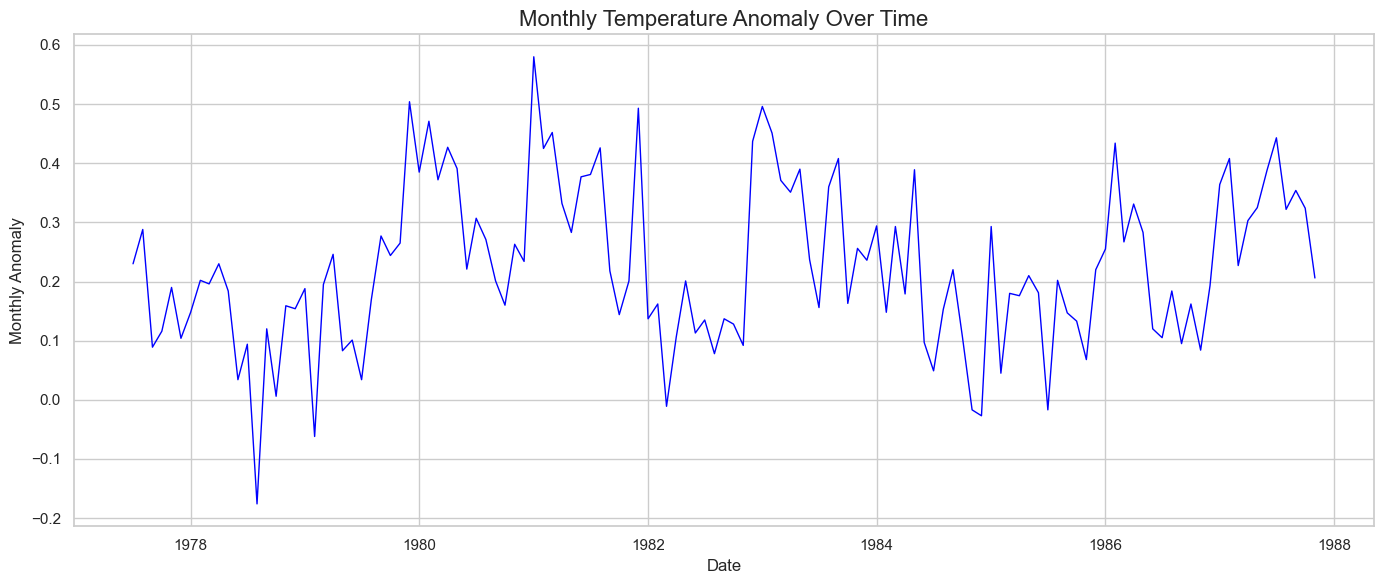

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


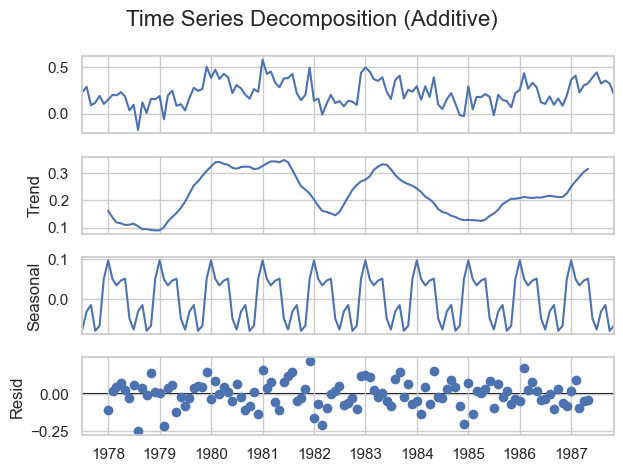

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
result = seasonal_decompose(df, model='additive', period=12)  # period=12 for monthly data (1 year)

# Plot the decomposition
result.plot()
plt.suptitle('Time Series Decomposition (Additive)', fontsize=16)
plt.tight_layout()
plt.show()

In [42]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram
import plotly.graph_objects as go

# ----- Replace this with your time series -----
# Assume your monthly time series is in a Pandas Series called `series`
series = df['Monthly_Anomaly']
series = series.dropna().values  # ensure no NaNs

# ----- Step 1: Compute periodogram -----
frequencies, power = periodogram(series)

# ----- Step 2: Convert frequency to period -----
nonzero_indices = frequencies > 0  # avoid division by zero
frequencies = frequencies[nonzero_indices]
power = power[nonzero_indices]
periods = 1 / frequencies

# ----- Step 3: Create a dataframe to find top periods -----
df_periods = pd.DataFrame({'Period': periods, 'Power': power})
df_top = df_periods.sort_values(by='Power', ascending=False).head(50)

# ----- Step 4: Plot with Plotly -----
fig = go.Figure()

fig.add_trace(go.Scatter(x=periods, y=power,
                         mode='lines',
                         name='Periodogram'))

# Mark top 5 seasonal periods
fig.add_trace(go.Scatter(x=df_top['Period'], y=df_top['Power'],
                         mode='markers+text',
                         text=[f"{p:.2f}" for p in df_top['Period']],
                         textposition='top center',
                         marker=dict(color='red', size=8),
                         name='Top 5 Peaks'))

fig.update_layout(title='Periodogram - Seasonality Detection',
                  xaxis_title='Period (in time steps)',
                  yaxis_title='Spectral Power',
                  template='plotly_white')

fig.show()

# ----- Step 5: Print top 5 periods -----
print("Top 5 Seasonality Periods (in time steps):")
print(df_top[['Period', 'Power']])

Top 5 Seasonality Periods (in time steps):
        Period     Power
2    41.666667  0.477411
6    17.857143  0.207246
9    12.500000  0.185608
1    62.500000  0.161125
30    4.032258  0.149440
4    25.000000  0.122087
0   125.000000  0.106688
22    5.434783  0.070908
3    31.250000  0.052588
58    2.118644  0.043950
46    2.659574  0.038318
56    2.192982  0.037887
44    2.777778  0.036810
19    6.250000  0.034969
12    9.615385  0.033539
11   10.416667  0.032827
10   11.363636  0.030589
18    6.578947  0.026833
29    4.166667  0.026744
59    2.083333  0.023520
5    20.833333  0.022884
23    5.208333  0.021850
57    2.155172  0.020459
60    2.049180  0.019586
50    2.450980  0.017447
26    4.629630  0.016917
16    7.352941  0.016763
14    8.333333  0.016728
8    13.888889  0.015791
15    7.812500  0.015215
42    2.906977  0.015178
35    3.472222  0.014652
37    3.289474  0.014182
21    5.681818  0.014042
43    2.840909  0.013930
45    2.717391  0.012733
53    2.314815  0.012502
13    8

In [43]:
from statsmodels.tsa.stattools import adfuller

# Suppose your series is called 'Monthly_Anomaly'
# Replace with your actual pandas Series name
result = adfuller(df['Monthly_Anomaly'].dropna())

# Extracting results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

# Printing results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic      : {adf_statistic}")
print(f"p-value            : {p_value}")
print(f"Number of lags     : {used_lag}")
print(f"Number of obs used : {n_obs}")
print("Critical Values    :")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Stationarity decision
if p_value < 0.05:
    print("\n✅ The series is likely **stationary** (reject null hypothesis).")
else:
    print("\n❌ The series is likely **non-stationary** (fail to reject null hypothesis).")


Augmented Dickey-Fuller Test Results:
ADF Statistic      : -2.1381461499686027
p-value            : 0.2294549545819014
Number of lags     : 10
Number of obs used : 114
Critical Values    :
   1%: -3.489057523907491
   5%: -2.887246327182993
   10%: -2.5804808802708528

❌ The series is likely **non-stationary** (fail to reject null hypothesis).


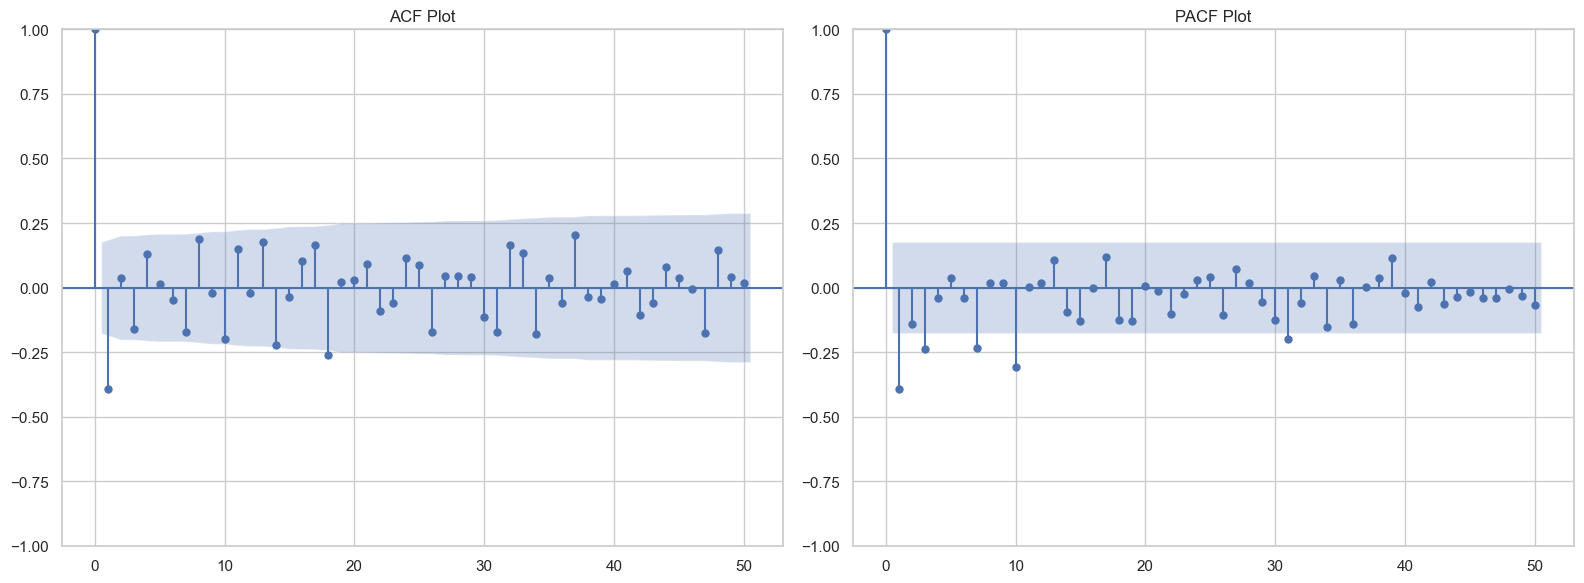

In [44]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use the original or differenced series
series = df['Monthly_Anomaly'].diff().dropna()  # Use differenced if original was non-stationary

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(series, ax=axes[0], lags=50, title='ACF Plot')
plot_pacf(series, ax=axes[1], lags=50, title='PACF Plot', method='ywm')

plt.tight_layout()
plt.show()

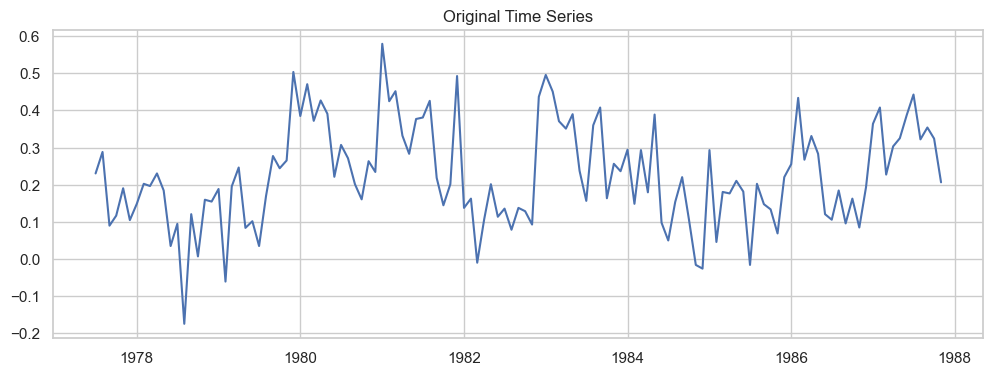

ADF Test on Original Series:
ADF Statistic: -2.1381461499686027
p-value      : 0.2294549545819014
❌ The series is likely Non-Stationary (could be a Random Walk)


<Figure size 1000x400 with 0 Axes>

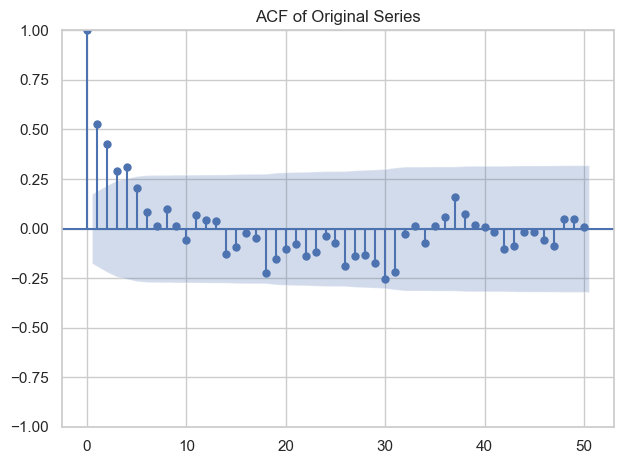


ADF Test on First-Differenced Series:
ADF Statistic: -5.598082108516279
p-value      : 1.283327802818258e-06
✅ The differenced series is Stationary


<Figure size 1000x400 with 0 Axes>

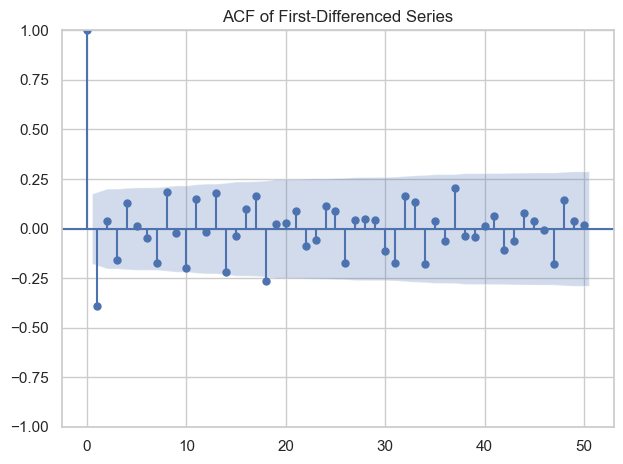


🔍 FINAL CONCLUSION:
✅ Based on ADF tests and visual inspection, your time series is likely a **Random Walk**.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# --- STEP 1: Load your time series ---
series = df['Monthly_Anomaly'].dropna()

# --- STEP 2: Plot original series ---
plt.figure(figsize=(12, 4))
plt.plot(series)
plt.title("Original Time Series")
plt.grid(True)
plt.show()

# --- STEP 3: ADF Test on original series ---
adf_result = adfuller(series)
adf_stat_orig = adf_result[0]
p_val_orig = adf_result[1]

print("ADF Test on Original Series:")
print(f"ADF Statistic: {adf_stat_orig}")
print(f"p-value      : {p_val_orig}")
if p_val_orig > 0.05:
    print("❌ The series is likely Non-Stationary (could be a Random Walk)")
else:
    print("✅ The series is likely Stationary")

# --- STEP 4: Plot ACF of original series ---
plt.figure(figsize=(10, 4))
plot_acf(series, lags=50)
plt.title("ACF of Original Series")
plt.tight_layout()
plt.show()

# --- STEP 5: First differencing ---
diff_series = series.diff().dropna()

# --- STEP 6: ADF Test on differenced series ---
adf_diff_result = adfuller(diff_series)
adf_stat_diff = adf_diff_result[0]
p_val_diff = adf_diff_result[1]

print("\nADF Test on First-Differenced Series:")
print(f"ADF Statistic: {adf_stat_diff}")
print(f"p-value      : {p_val_diff}")
if p_val_diff < 0.05:
    print("✅ The differenced series is Stationary")
else:
    print("❌ The differenced series is still Non-Stationary")

# --- STEP 7: Plot ACF of differenced series ---
plt.figure(figsize=(10, 4))
plot_acf(diff_series, lags=50)
plt.title("ACF of First-Differenced Series")
plt.tight_layout()
plt.show()

# --- FINAL CONCLUSION ---
print("\n🔍 FINAL CONCLUSION:")
if p_val_orig > 0.05 and p_val_diff < 0.05:
    print("✅ Based on ADF tests and visual inspection, your time series is likely a **Random Walk**.")
else:
    print("❌ Your time series does not exhibit the characteristics of a pure Random Walk.")

In [46]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import itertools

warnings.filterwarnings("ignore")

# Assuming your original data is in `df['Temperature']`
y = df['Monthly_Anomaly']

# Define parameter range
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Create all combinations
pdq = list(itertools.product(p, d, q))

# Track best model
best_aic = np.inf
best_order = None
results = []

for order in pdq:
    try:
        model = ARIMA(y, order=order)
        result = model.fit()
        results.append({'order': order, 'aic': result.aic})
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
    except:
        continue

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).sort_values(by='aic')

# Show best model
print("Best ARIMA order:", best_order)
print("Lowest AIC:", best_aic)
results_df.head()

Best ARIMA order: (3, 0, 3)
Lowest AIC: -185.41347512256516


order         aic
27  (3, 0, 3) -185.413475
9   (1, 0, 1) -181.781152
16  (2, 0, 0) -181.706051
17  (2, 0, 1) -179.838226
10  (1, 0, 2) -179.822376

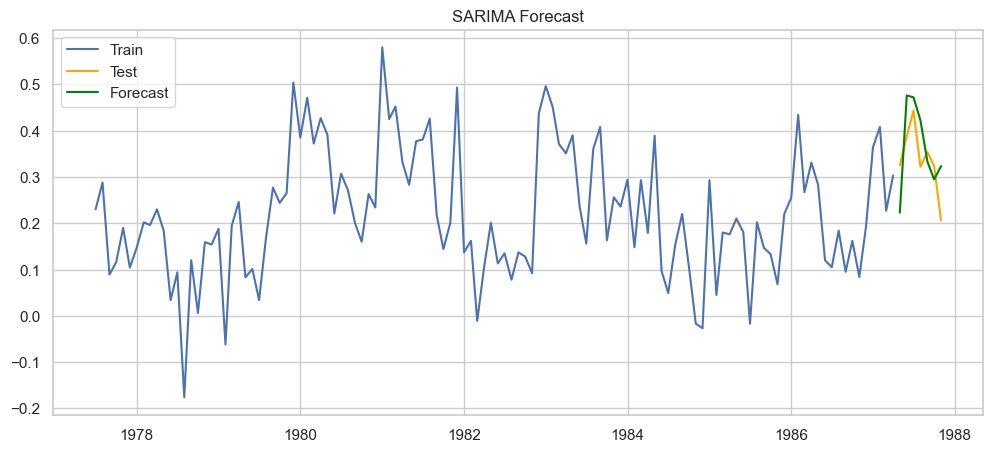

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df

# Step 2: Train-test split (90%-10%)
train_size = int(len(df) * 0.95)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model3 = SARIMAX(train,
                order=(3, 0, 3),
                seasonal_order=(3, 1, 2 , 18),
                enforce_stationarity=False,
                enforce_invertibility=False)

result3 = model3.fit(disp=False)

# Step 4: Forecast
forecast = result3.forecast(steps=len(test))

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# df4

In [48]:
df = df4

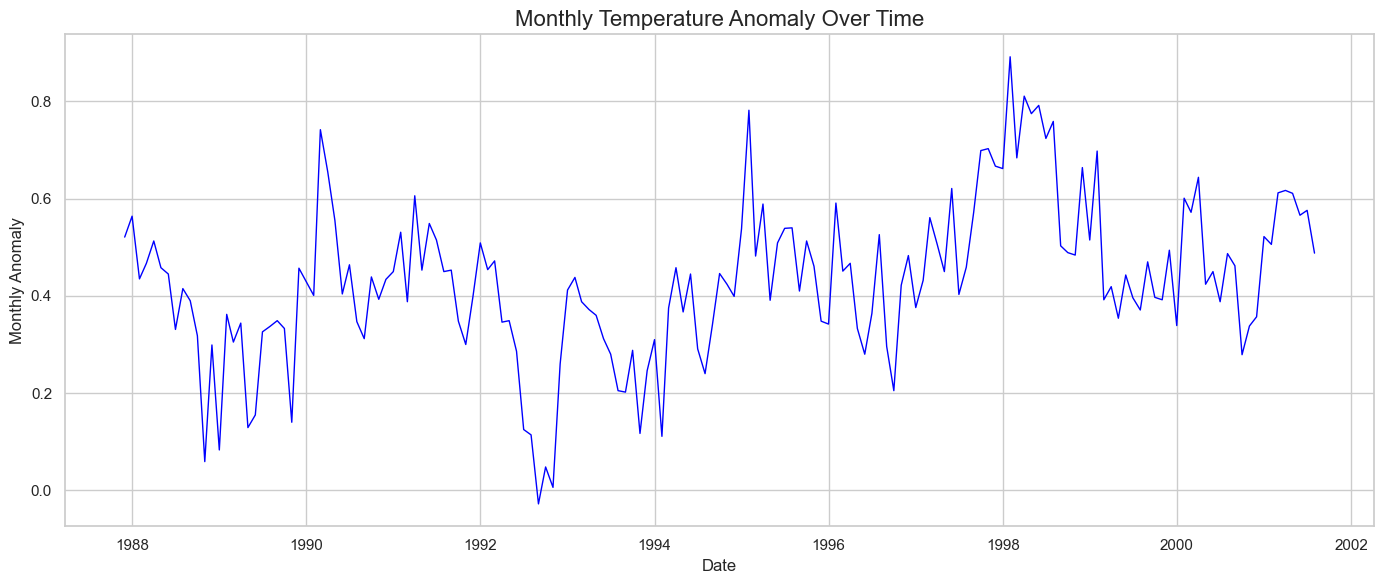

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


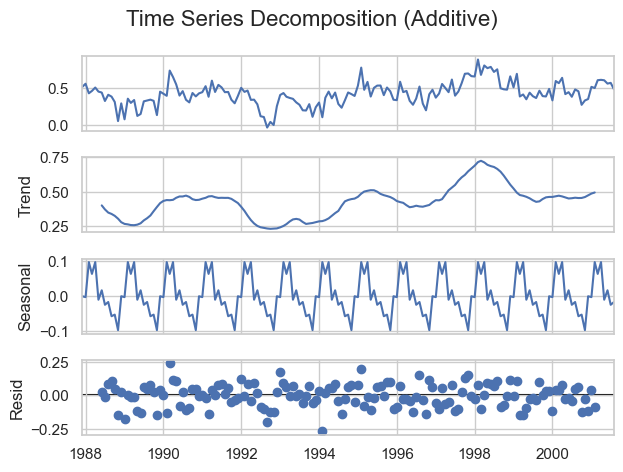

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
result = seasonal_decompose(df, model='additive', period=12)  # period=12 for monthly data (1 year)

# Plot the decomposition
result.plot()
plt.suptitle('Time Series Decomposition (Additive)', fontsize=16)
plt.tight_layout()
plt.show()

In [51]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram
import plotly.graph_objects as go

# ----- Replace this with your time series -----
# Assume your monthly time series is in a Pandas Series called `series`
series = df['Monthly_Anomaly']
series = series.dropna().values  # ensure no NaNs

# ----- Step 1: Compute periodogram -----
frequencies, power = periodogram(series)

# ----- Step 2: Convert frequency to period -----
nonzero_indices = frequencies > 0  # avoid division by zero
frequencies = frequencies[nonzero_indices]
power = power[nonzero_indices]
periods = 1 / frequencies

# ----- Step 3: Create a dataframe to find top periods -----
df_periods = pd.DataFrame({'Period': periods, 'Power': power})
df_top = df_periods.sort_values(by='Power', ascending=False).head(50)

# ----- Step 4: Plot with Plotly -----
fig = go.Figure()

fig.add_trace(go.Scatter(x=periods, y=power,
                         mode='lines',
                         name='Periodogram'))

# Mark top 5 seasonal periods
fig.add_trace(go.Scatter(x=df_top['Period'], y=df_top['Power'],
                         mode='markers+text',
                         text=[f"{p:.2f}" for p in df_top['Period']],
                         textposition='top center',
                         marker=dict(color='red', size=8),
                         name='Top 5 Peaks'))

fig.update_layout(title='Periodogram - Seasonality Detection',
                  xaxis_title='Period (in time steps)',
                  yaxis_title='Spectral Power',
                  template='plotly_white')

fig.show()

# ----- Step 5: Print top 5 periods -----
print("Top 5 Seasonality Periods (in time steps):")
print(df_top[['Period', 'Power']])

Top 5 Seasonality Periods (in time steps):
        Period     Power
0   165.000000  0.903749
3    41.250000  0.887312
13   11.785714  0.324700
1    82.500000  0.250965
4    33.000000  0.215611
7    20.625000  0.201766
6    23.571429  0.091180
2    55.000000  0.079561
14   11.000000  0.062651
81    2.012195  0.059621
23    6.875000  0.059312
53    3.055556  0.058083
19    8.250000  0.056979
11   13.750000  0.055717
9    16.500000  0.053053
24    6.600000  0.047938
34    4.714286  0.043553
12   12.692308  0.041092
31    5.156250  0.036618
50    3.235294  0.033558
71    2.291667  0.031712
80    2.037037  0.030723
29    5.500000  0.030424
36    4.459459  0.029749
39    4.125000  0.029204
5    27.500000  0.028564
8    18.333333  0.025921
64    2.538462  0.023709
22    7.173913  0.023518
74    2.200000  0.023321
67    2.426471  0.021480
51    3.173077  0.020633
75    2.171053  0.019642
61    2.661290  0.019587
27    5.892857  0.019138
59    2.750000  0.017476
49    3.300000  0.016774
44    3

In [52]:
from statsmodels.tsa.stattools import adfuller

# Suppose your series is called 'Monthly_Anomaly'
# Replace with your actual pandas Series name
result = adfuller(df['Monthly_Anomaly'].dropna())

# Extracting results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

# Printing results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic      : {adf_statistic}")
print(f"p-value            : {p_value}")
print(f"Number of lags     : {used_lag}")
print(f"Number of obs used : {n_obs}")
print("Critical Values    :")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Stationarity decision
if p_value < 0.05:
    print("\n✅ The series is likely **stationary** (reject null hypothesis).")
else:
    print("\n❌ The series is likely **non-stationary** (fail to reject null hypothesis).")


Augmented Dickey-Fuller Test Results:
ADF Statistic      : -3.7676498453583256
p-value            : 0.0032561936041351274
Number of lags     : 1
Number of obs used : 163
Critical Values    :
   1%: -3.471118535474365
   5%: -2.8794405060097024
   10%: -2.576313761526591

✅ The series is likely **stationary** (reject null hypothesis).


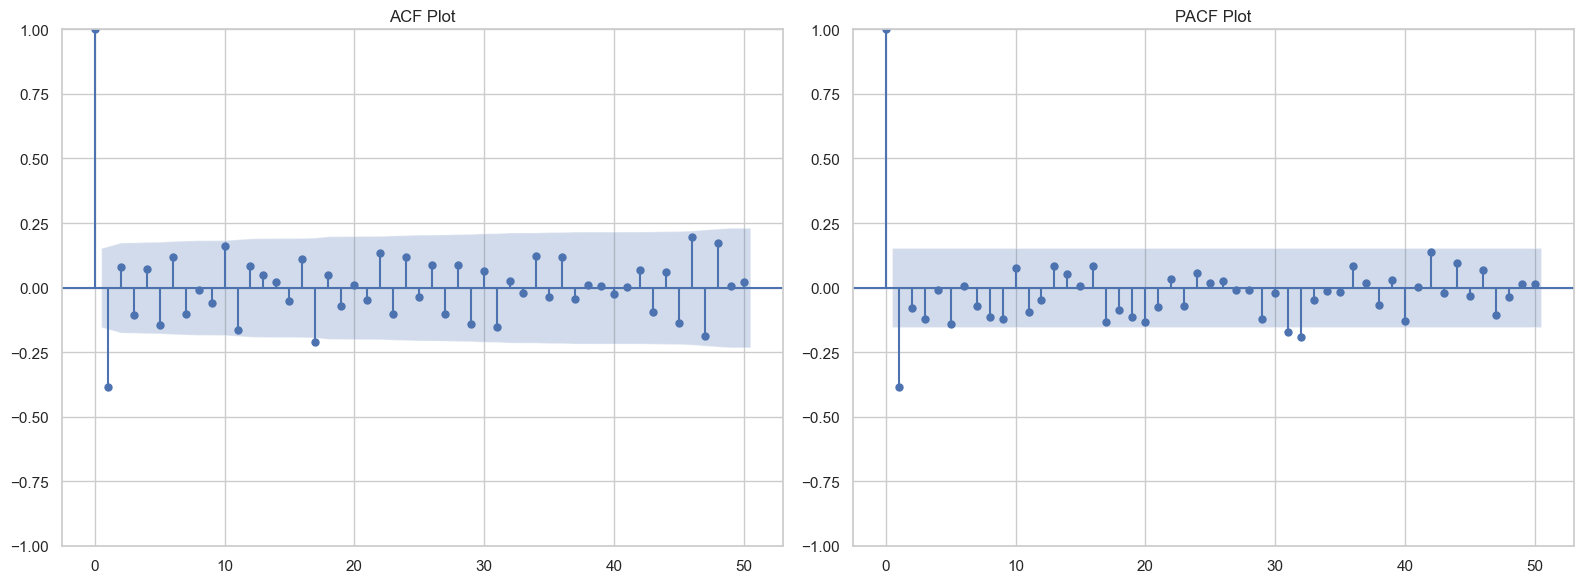

In [53]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use the original or differenced series
series = df['Monthly_Anomaly'].diff().dropna()  # Use differenced if original was non-stationary

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(series, ax=axes[0], lags=50, title='ACF Plot')
plot_pacf(series, ax=axes[1], lags=50, title='PACF Plot', method='ywm')

plt.tight_layout()
plt.show()


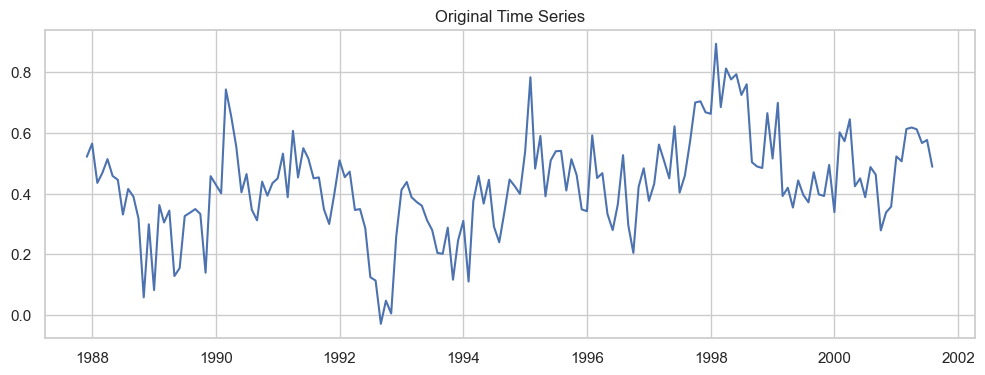

ADF Test on Original Series:
ADF Statistic: -3.7676498453583256
p-value      : 0.0032561936041351274
✅ The series is likely Stationary


<Figure size 1000x400 with 0 Axes>

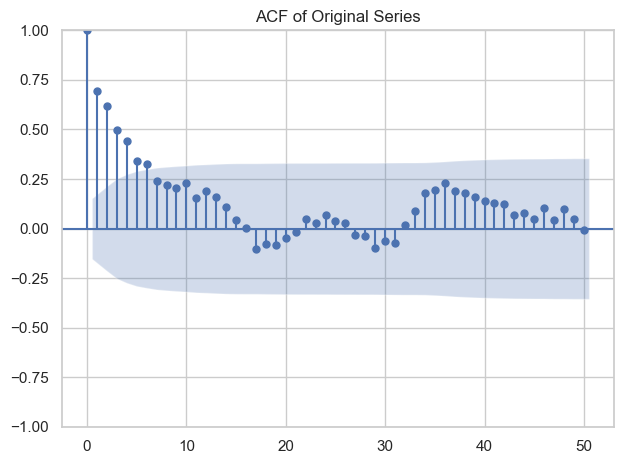


ADF Test on First-Differenced Series:
ADF Statistic: -19.033479044421657
p-value      : 0.0
✅ The differenced series is Stationary


<Figure size 1000x400 with 0 Axes>

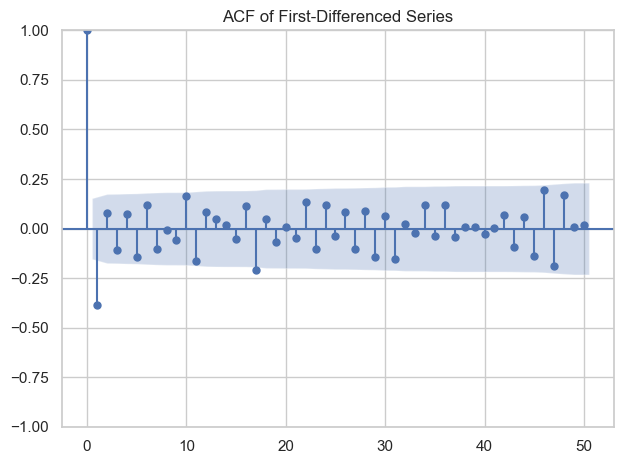


🔍 FINAL CONCLUSION:
❌ Your time series does not exhibit the characteristics of a pure Random Walk.


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# --- STEP 1: Load your time series ---
series = df['Monthly_Anomaly'].dropna()

# --- STEP 2: Plot original series ---
plt.figure(figsize=(12, 4))
plt.plot(series)
plt.title("Original Time Series")
plt.grid(True)
plt.show()

# --- STEP 3: ADF Test on original series ---
adf_result = adfuller(series)
adf_stat_orig = adf_result[0]
p_val_orig = adf_result[1]

print("ADF Test on Original Series:")
print(f"ADF Statistic: {adf_stat_orig}")
print(f"p-value      : {p_val_orig}")
if p_val_orig > 0.05:
    print("❌ The series is likely Non-Stationary (could be a Random Walk)")
else:
    print("✅ The series is likely Stationary")

# --- STEP 4: Plot ACF of original series ---
plt.figure(figsize=(10, 4))
plot_acf(series, lags=50)
plt.title("ACF of Original Series")
plt.tight_layout()
plt.show()

# --- STEP 5: First differencing ---
diff_series = series.diff().dropna()

# --- STEP 6: ADF Test on differenced series ---
adf_diff_result = adfuller(diff_series)
adf_stat_diff = adf_diff_result[0]
p_val_diff = adf_diff_result[1]

print("\nADF Test on First-Differenced Series:")
print(f"ADF Statistic: {adf_stat_diff}")
print(f"p-value      : {p_val_diff}")
if p_val_diff < 0.05:
    print("✅ The differenced series is Stationary")
else:
    print("❌ The differenced series is still Non-Stationary")

# --- STEP 7: Plot ACF of differenced series ---
plt.figure(figsize=(10, 4))
plot_acf(diff_series, lags=50)
plt.title("ACF of First-Differenced Series")
plt.tight_layout()
plt.show()

# --- FINAL CONCLUSION ---
print("\n🔍 FINAL CONCLUSION:")
if p_val_orig > 0.05 and p_val_diff < 0.05:
    print("✅ Based on ADF tests and visual inspection, your time series is likely a **Random Walk**.")
else:
    print("❌ Your time series does not exhibit the characteristics of a pure Random Walk.")

In [55]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import itertools

warnings.filterwarnings("ignore")

# Assuming your original data is in `df['Temperature']`
y = df['Monthly_Anomaly']

# Define parameter range
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Create all combinations
pdq = list(itertools.product(p, d, q))

# Track best model
best_aic = np.inf
best_order = None
results = []

for order in pdq:
    try:
        model = ARIMA(y, order=order)
        result = model.fit()
        results.append({'order': order, 'aic': result.aic})
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
    except:
        continue

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).sort_values(by='aic')

# Show best model
print("Best ARIMA order:", best_order)
print("Lowest AIC:", best_aic)
results_df.head()

Best ARIMA order: (2, 0, 2)
Lowest AIC: -249.09940029221912


order         aic
18  (2, 0, 2) -249.099400
25  (3, 0, 1) -247.668109
16  (2, 0, 0) -247.326305
19  (2, 0, 3) -246.894665
9   (1, 0, 1) -246.115294

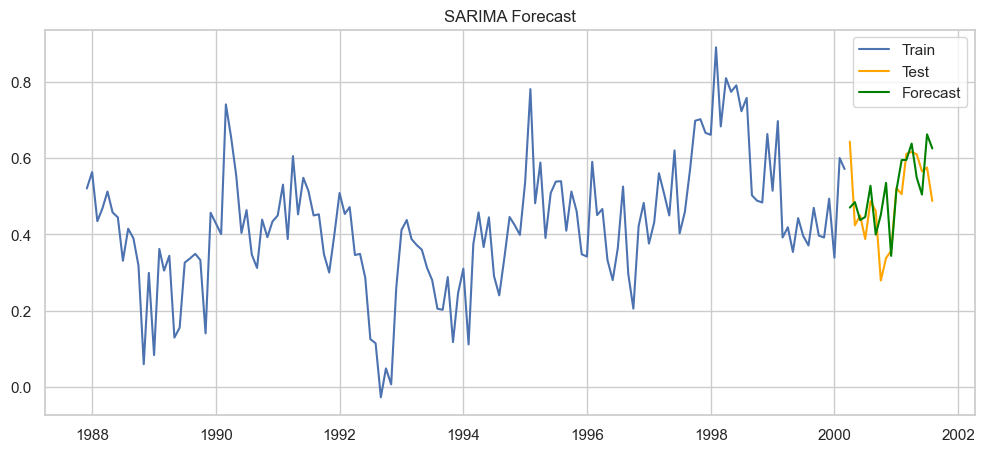

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df

# Step 2: Train-test split (90%-10%)
train_size = int(len(df) * 0.90)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model4 = SARIMAX(train,
                order=(3, 0, 1),
                seasonal_order=(1, 1, 2 , 41),
                enforce_stationarity=False,
                enforce_invertibility=False)

result4 = model4.fit(disp=False)

# Step 4: Forecast
forecast = result4.forecast(steps=len(test))

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# df5

In [57]:
df = df5

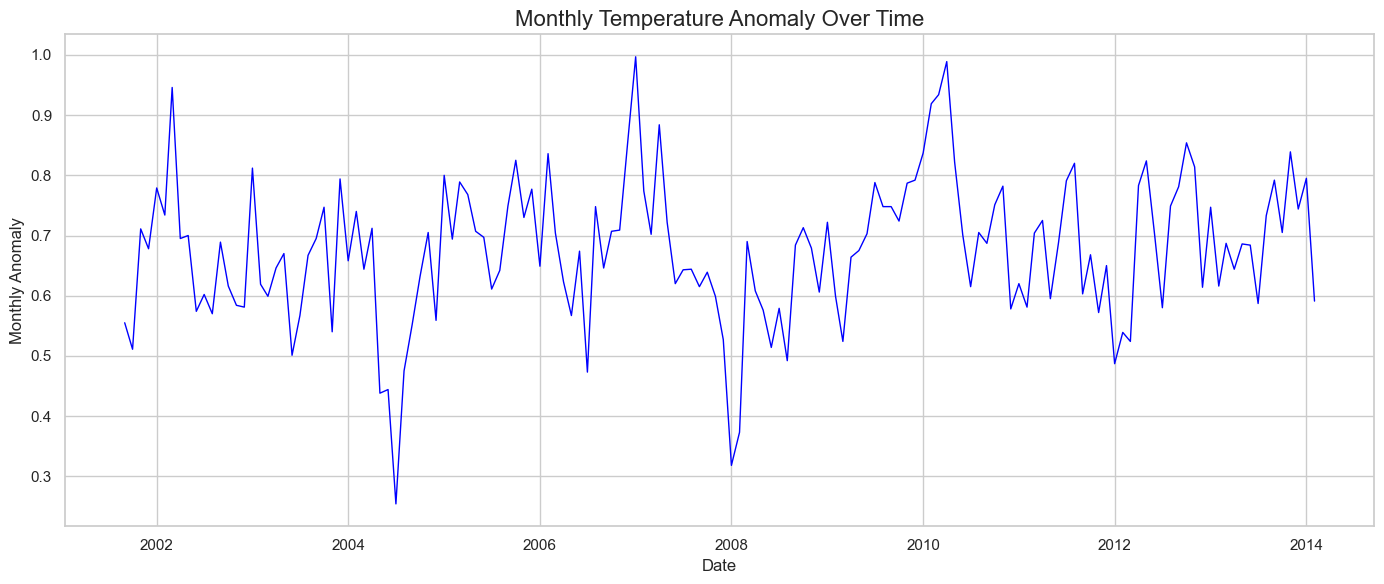

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


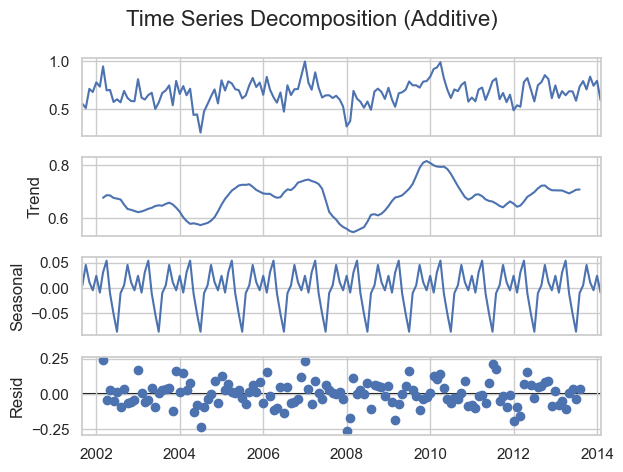

In [59]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
result = seasonal_decompose(df, model='additive', period=12)  # period=12 for monthly data (1 year)

# Plot the decomposition
result.plot()
plt.suptitle('Time Series Decomposition (Additive)', fontsize=16)
plt.tight_layout()
plt.show()

In [60]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram
import plotly.graph_objects as go

# ----- Replace this with your time series -----
# Assume your monthly time series is in a Pandas Series called `series`
series = df['Monthly_Anomaly']
series = series.dropna().values  # ensure no NaNs

# ----- Step 1: Compute periodogram -----
frequencies, power = periodogram(series)

# ----- Step 2: Convert frequency to period -----
nonzero_indices = frequencies > 0  # avoid division by zero
frequencies = frequencies[nonzero_indices]
power = power[nonzero_indices]
periods = 1 / frequencies

# ----- Step 3: Create a dataframe to find top periods -----
df_periods = pd.DataFrame({'Period': periods, 'Power': power})
df_top = df_periods.sort_values(by='Power', ascending=False).head(50)

# ----- Step 4: Plot with Plotly -----
fig = go.Figure()

fig.add_trace(go.Scatter(x=periods, y=power,
                         mode='lines',
                         name='Periodogram'))

# Mark top 5 seasonal periods
fig.add_trace(go.Scatter(x=df_top['Period'], y=df_top['Power'],
                         mode='markers+text',
                         text=[f"{p:.2f}" for p in df_top['Period']],
                         textposition='top center',
                         marker=dict(color='red', size=8),
                         name='Top 5 Peaks'))

fig.update_layout(title='Periodogram - Seasonality Detection',
                  xaxis_title='Period (in time steps)',
                  yaxis_title='Spectral Power',
                  template='plotly_white')

fig.show()

# ----- Step 5: Print top 5 periods -----
print("Top 5 Seasonality Periods (in time steps):")
print(df_top[['Period', 'Power']])

Top 5 Seasonality Periods (in time steps):
        Period     Power
2    50.000000  0.277694
12   11.538462  0.148483
7    18.750000  0.138595
3    37.500000  0.132854
6    21.428571  0.091758
9    15.000000  0.077554
11   12.500000  0.071925
24    6.000000  0.069386
72    2.054795  0.054539
0   150.000000  0.050930
13   10.714286  0.047818
29    5.000000  0.044863
19    7.500000  0.043948
40    3.658537  0.043376
4    30.000000  0.039976
30    4.838710  0.039964
8    16.666667  0.039238
16    8.823529  0.038531
18    7.894737  0.031455
21    6.818182  0.031133
34    4.285714  0.028209
5    25.000000  0.027530
43    3.409091  0.026347
56    2.631579  0.025119
1    75.000000  0.024108
70    2.112676  0.023377
68    2.173913  0.023339
15    9.375000  0.023248
66    2.238806  0.021962
10   13.636364  0.021906
35    4.166667  0.021789
69    2.142857  0.021079
41    3.571429  0.020651
17    8.333333  0.020417
55    2.678571  0.020385
22    6.521739  0.020134
73    2.027027  0.013036
71    2

In [61]:
from statsmodels.tsa.stattools import adfuller

# Suppose your series is called 'Monthly_Anomaly'
# Replace with your actual pandas Series name
result = adfuller(df['Monthly_Anomaly'].dropna())

# Extracting results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

# Printing results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic      : {adf_statistic}")
print(f"p-value            : {p_value}")
print(f"Number of lags     : {used_lag}")
print(f"Number of obs used : {n_obs}")
print("Critical Values    :")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Stationarity decision
if p_value < 0.05:
    print("\n✅ The series is likely **stationary** (reject null hypothesis).")
else:
    print("\n❌ The series is likely **non-stationary** (fail to reject null hypothesis).")


Augmented Dickey-Fuller Test Results:
ADF Statistic      : -5.200785411276508
p-value            : 8.75968020628933e-06
Number of lags     : 1
Number of obs used : 148
Critical Values    :
   1%: -3.4753253063120644
   5%: -2.881274703275226
   10%: -2.5772928360116873

✅ The series is likely **stationary** (reject null hypothesis).


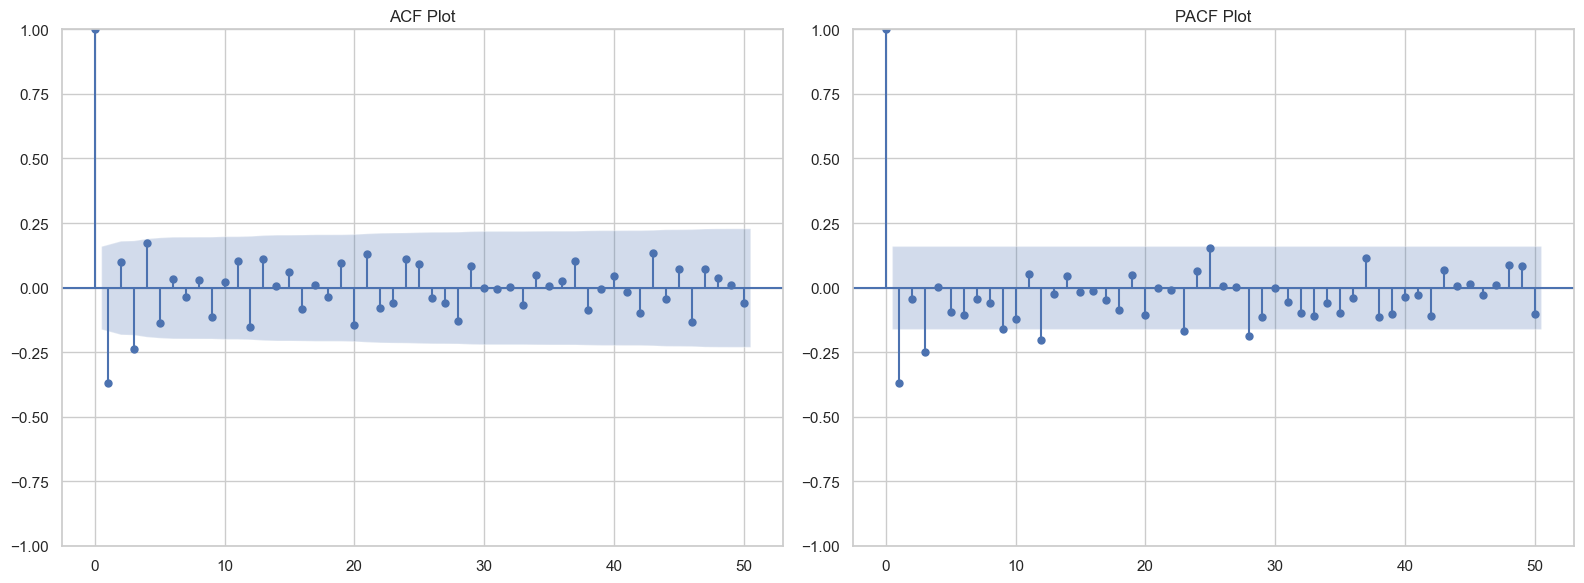

In [62]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use the original or differenced series
series = df['Monthly_Anomaly'].diff().dropna()  # Use differenced if original was non-stationary

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(series, ax=axes[0], lags=50, title='ACF Plot')
plot_pacf(series, ax=axes[1], lags=50, title='PACF Plot', method='ywm')

plt.tight_layout()
plt.show()


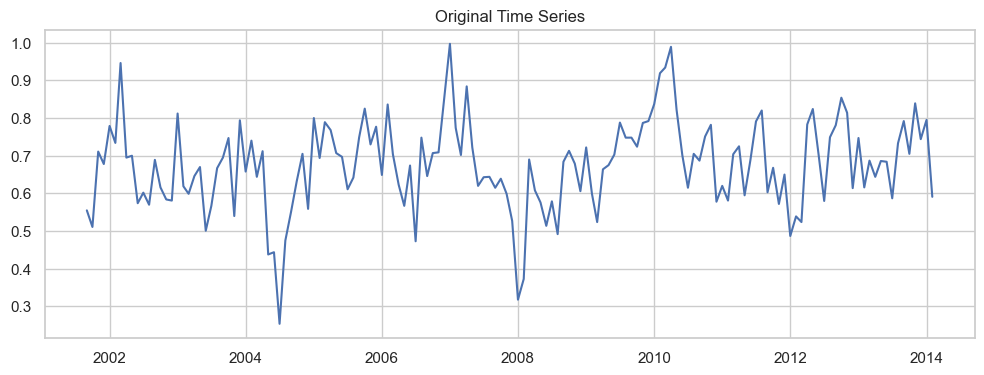

ADF Test on Original Series:
ADF Statistic: -5.200785411276508
p-value      : 8.75968020628933e-06
✅ The series is likely Stationary


<Figure size 1000x400 with 0 Axes>

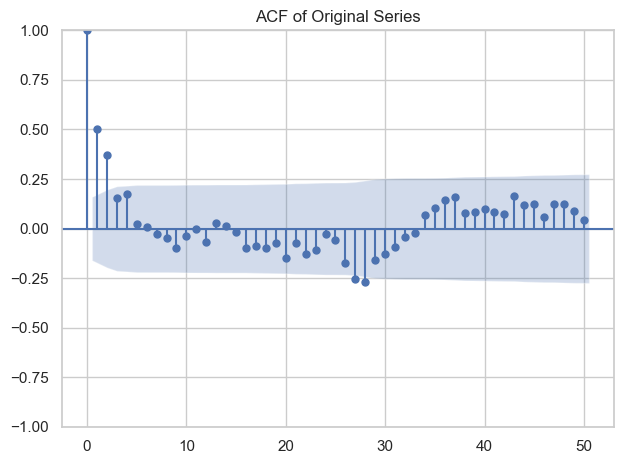


ADF Test on First-Differenced Series:
ADF Statistic: -10.170032735567743
p-value      : 7.129718519799895e-18
✅ The differenced series is Stationary


<Figure size 1000x400 with 0 Axes>

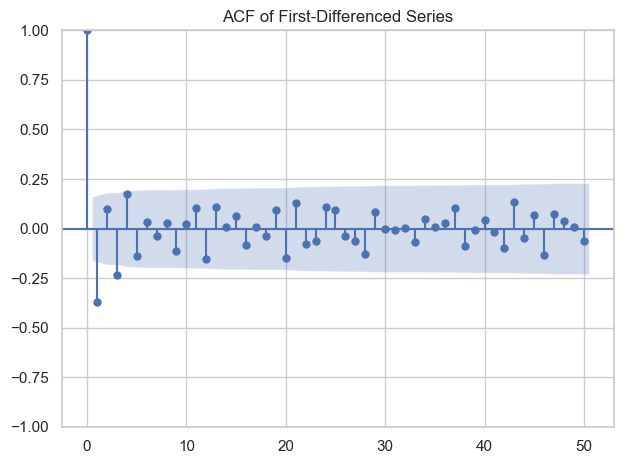


🔍 FINAL CONCLUSION:
❌ Your time series does not exhibit the characteristics of a pure Random Walk.


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# --- STEP 1: Load your time series ---
series = df['Monthly_Anomaly'].dropna()

# --- STEP 2: Plot original series ---
plt.figure(figsize=(12, 4))
plt.plot(series)
plt.title("Original Time Series")
plt.grid(True)
plt.show()

# --- STEP 3: ADF Test on original series ---
adf_result = adfuller(series)
adf_stat_orig = adf_result[0]
p_val_orig = adf_result[1]

print("ADF Test on Original Series:")
print(f"ADF Statistic: {adf_stat_orig}")
print(f"p-value      : {p_val_orig}")
if p_val_orig > 0.05:
    print("❌ The series is likely Non-Stationary (could be a Random Walk)")
else:
    print("✅ The series is likely Stationary")

# --- STEP 4: Plot ACF of original series ---
plt.figure(figsize=(10, 4))
plot_acf(series, lags=50)
plt.title("ACF of Original Series")
plt.tight_layout()
plt.show()

# --- STEP 5: First differencing ---
diff_series = series.diff().dropna()

# --- STEP 6: ADF Test on differenced series ---
adf_diff_result = adfuller(diff_series)
adf_stat_diff = adf_diff_result[0]
p_val_diff = adf_diff_result[1]

print("\nADF Test on First-Differenced Series:")
print(f"ADF Statistic: {adf_stat_diff}")
print(f"p-value      : {p_val_diff}")
if p_val_diff < 0.05:
    print("✅ The differenced series is Stationary")
else:
    print("❌ The differenced series is still Non-Stationary")

# --- STEP 7: Plot ACF of differenced series ---
plt.figure(figsize=(10, 4))
plot_acf(diff_series, lags=50)
plt.title("ACF of First-Differenced Series")
plt.tight_layout()
plt.show()

# --- FINAL CONCLUSION ---
print("\n🔍 FINAL CONCLUSION:")
if p_val_orig > 0.05 and p_val_diff < 0.05:
    print("✅ Based on ADF tests and visual inspection, your time series is likely a **Random Walk**.")
else:
    print("❌ Your time series does not exhibit the characteristics of a pure Random Walk.")

In [64]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import itertools

warnings.filterwarnings("ignore")

# Assuming your original data is in `df['Temperature']`
y = df['Monthly_Anomaly']

# Define parameter range
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Create all combinations
pdq = list(itertools.product(p, d, q))

# Track best model
best_aic = np.inf
best_order = None
results = []

for order in pdq:
    try:
        model = ARIMA(y, order=order)
        result = model.fit()
        results.append({'order': order, 'aic': result.aic})
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
    except:
        continue

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).sort_values(by='aic')

# Show best model
print("Best ARIMA order:", best_order)
print("Lowest AIC:", best_aic)
results_df.head()

Best ARIMA order: (2, 0, 1)
Lowest AIC: -256.3115702341802


order         aic
17  (2, 0, 1) -256.311570
18  (2, 0, 2) -254.681831
25  (3, 0, 1) -254.560076
24  (3, 0, 0) -253.738392
16  (2, 0, 0) -253.591426

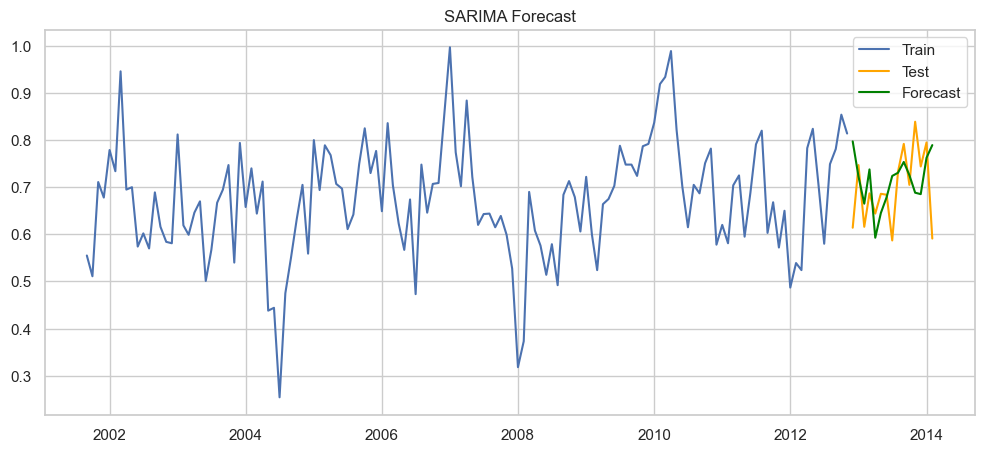

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df

# Step 2: Train-test split (90%-10%)
train_size = int(len(df) * 0.90)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model5 = SARIMAX(train,
                order=(2, 0, 0),
                seasonal_order=(1, 1, 1 , 50),
                enforce_stationarity=False,
                enforce_invertibility=False)

result5 = model5.fit(disp=False)

# Step 4: Forecast
forecast = result5.forecast(steps=len(test))

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

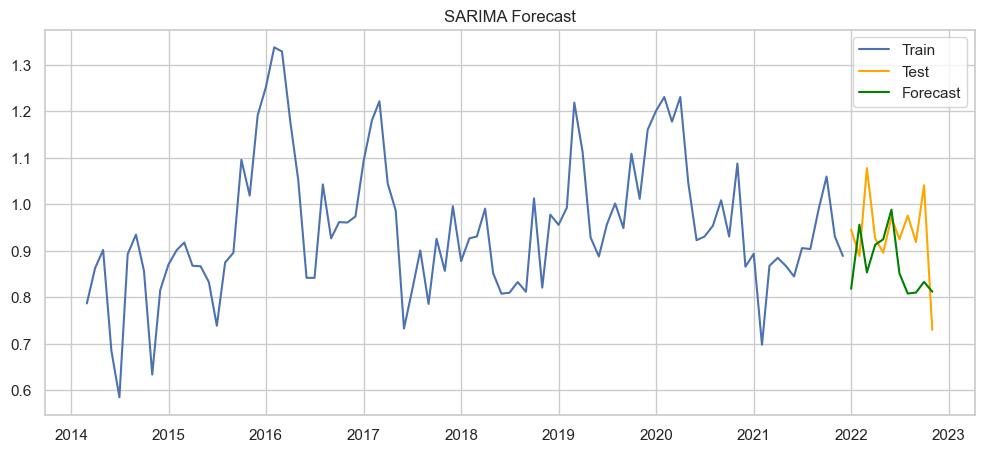

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df

# Step 2: Train-test split (90%-10%)
train_size = int(len(df) * 0.90)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model5 = SARIMAX(train,
                order=(3, 0, 0),
                seasonal_order=(2, 1 , 2 , 50),
                enforce_stationarity=False,
                enforce_invertibility=False)

result5 = model5.fit(disp=False)

# Step 4: Forecast
forecast = result5.forecast(steps=len(test))

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# df6

In [77]:
df = df6

In [78]:
df.shape

(105, 1)

In [79]:
df

Monthly_Anomaly
Date                       
2014-03-01            0.787
2014-04-01            0.863
2014-05-01            0.902
2014-06-01            0.685
2014-07-01            0.585
...                     ...
2022-07-01            0.925
2022-08-01            0.976
2022-09-01            0.919
2022-10-01            1.041
2022-11-01            0.730

[105 rows x 1 columns]

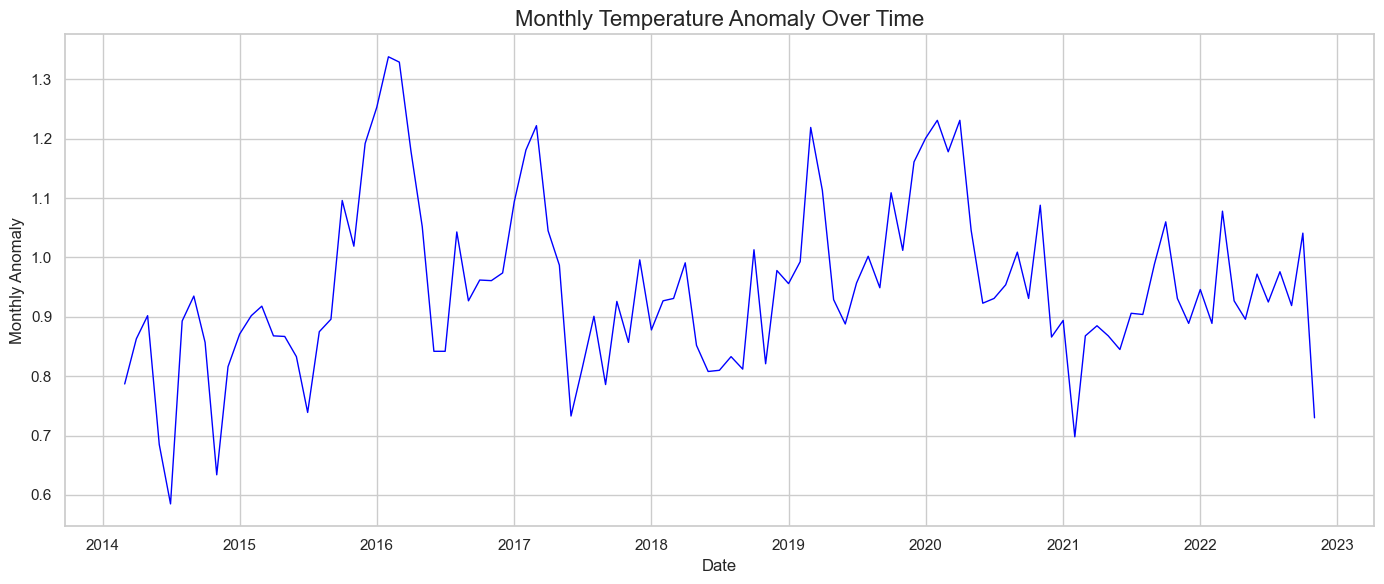

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


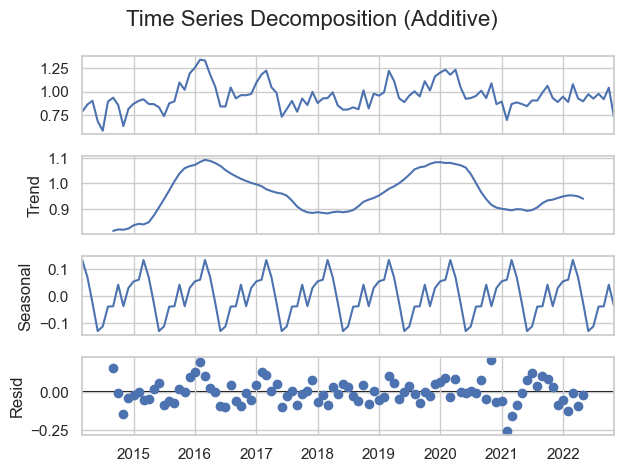

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
result = seasonal_decompose(df, model='additive', period=12)  # period=12 for monthly data (1 year)

# Plot the decomposition
result.plot()
plt.suptitle('Time Series Decomposition (Additive)', fontsize=16)
plt.tight_layout()
plt.show()

In [82]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram
import plotly.graph_objects as go

# ----- Replace this with your time series -----
# Assume your monthly time series is in a Pandas Series called `series`
series = df['Monthly_Anomaly']
series = series.dropna().values  # ensure no NaNs

# ----- Step 1: Compute periodogram -----
frequencies, power = periodogram(series)

# ----- Step 2: Convert frequency to period -----
nonzero_indices = frequencies > 0  # avoid division by zero
frequencies = frequencies[nonzero_indices]
power = power[nonzero_indices]
periods = 1 / frequencies

# ----- Step 3: Create a dataframe to find top periods -----
df_periods = pd.DataFrame({'Period': periods, 'Power': power})
df_top = df_periods.sort_values(by='Power', ascending=False).head(50)

# ----- Step 4: Plot with Plotly -----
fig = go.Figure()

fig.add_trace(go.Scatter(x=periods, y=power,
                         mode='lines',
                         name='Periodogram'))

# Mark top 5 seasonal periods
fig.add_trace(go.Scatter(x=df_top['Period'], y=df_top['Power'],
                         mode='markers+text',
                         text=[f"{p:.2f}" for p in df_top['Period']],
                         textposition='top center',
                         marker=dict(color='red', size=8),
                         name='Top 5 Peaks'))

fig.update_layout(title='Periodogram - Seasonality Detection',
                  xaxis_title='Period (in time steps)',
                  yaxis_title='Spectral Power',
                  template='plotly_white')

fig.show()

# ----- Step 5: Print top 5 periods -----
print("Top 5 Seasonality Periods (in time steps):")
print(df_top[['Period', 'Power']])

Top 5 Seasonality Periods (in time steps):
        Period     Power
1    52.500000  0.350416
2    35.000000  0.306733
8    11.666667  0.262071
7    13.125000  0.201841
3    26.250000  0.134610
0   105.000000  0.098757
16    6.176471  0.090121
5    17.500000  0.061116
10    9.545455  0.055099
26    3.888889  0.043901
17    5.833333  0.037964
20    5.000000  0.035576
43    2.386364  0.032805
24    4.200000  0.029403
49    2.100000  0.023085
6    15.000000  0.022797
44    2.333333  0.022511
18    5.526316  0.019053
19    5.250000  0.018238
9    10.500000  0.016838
35    2.916667  0.014945
13    7.500000  0.014534
23    4.375000  0.014282
45    2.282609  0.014169
12    8.076923  0.013936
51    2.019231  0.012829
31    3.281250  0.011982
22    4.565217  0.011679
48    2.142857  0.010138
46    2.234043  0.010004
21    4.772727  0.009714
28    3.620690  0.009538
27    3.750000  0.009038
42    2.441860  0.008546
34    3.000000  0.007847
36    2.837838  0.007396
40    2.560976  0.006489
47    2

In [83]:
from statsmodels.tsa.stattools import adfuller

# Suppose your series is called 'Monthly_Anomaly'
# Replace with your actual pandas Series name
result = adfuller(df['Monthly_Anomaly'].dropna())

# Extracting results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

# Printing results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic      : {adf_statistic}")
print(f"p-value            : {p_value}")
print(f"Number of lags     : {used_lag}")
print(f"Number of obs used : {n_obs}")
print("Critical Values    :")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Stationarity decision
if p_value < 0.05:
    print("\n✅ The series is likely **stationary** (reject null hypothesis).")
else:
    print("\n❌ The series is likely **non-stationary** (fail to reject null hypothesis).")


Augmented Dickey-Fuller Test Results:
ADF Statistic      : -3.1114331745522334
p-value            : 0.025718571127441633
Number of lags     : 13
Number of obs used : 91
Critical Values    :
   1%: -3.50434289821397
   5%: -2.8938659630479413
   10%: -2.5840147047458037

✅ The series is likely **stationary** (reject null hypothesis).


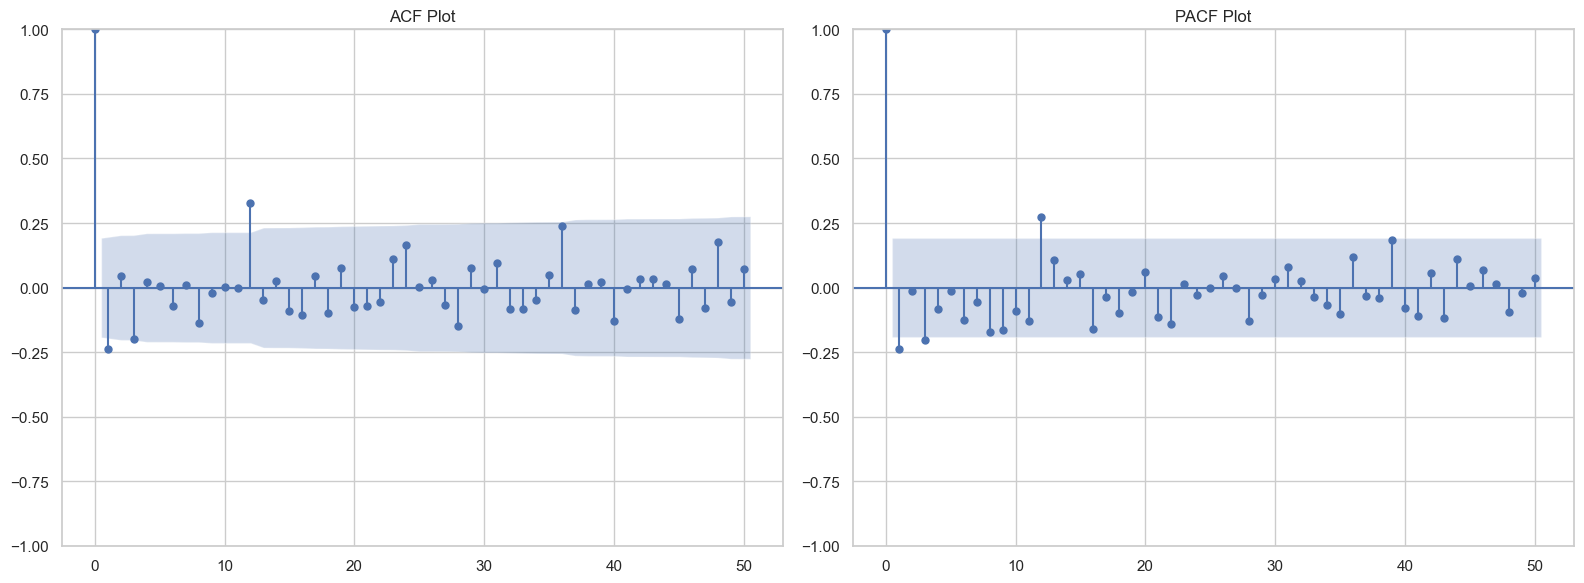

In [84]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use the original or differenced series
series = df['Monthly_Anomaly'].diff().dropna()  # Use differenced if original was non-stationary

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(series, ax=axes[0], lags=50, title='ACF Plot')
plot_pacf(series, ax=axes[1], lags=50, title='PACF Plot', method='ywm')

plt.tight_layout()
plt.show()

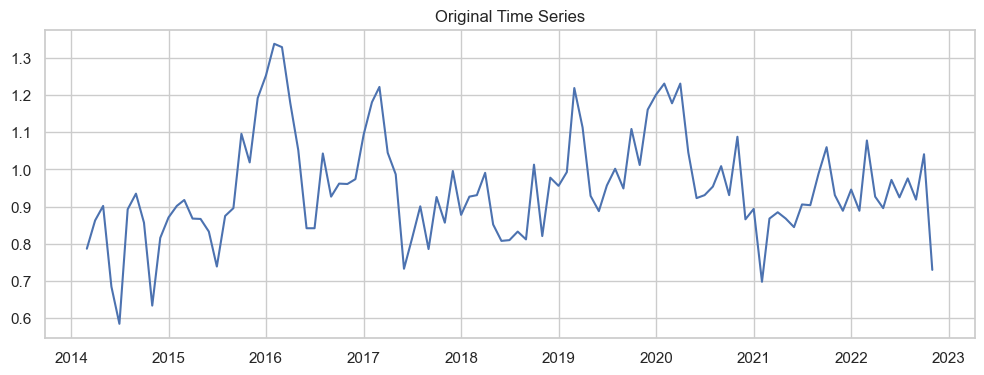

ADF Test on Original Series:
ADF Statistic: -3.1114331745522334
p-value      : 0.025718571127441633
✅ The series is likely Stationary


<Figure size 1000x400 with 0 Axes>

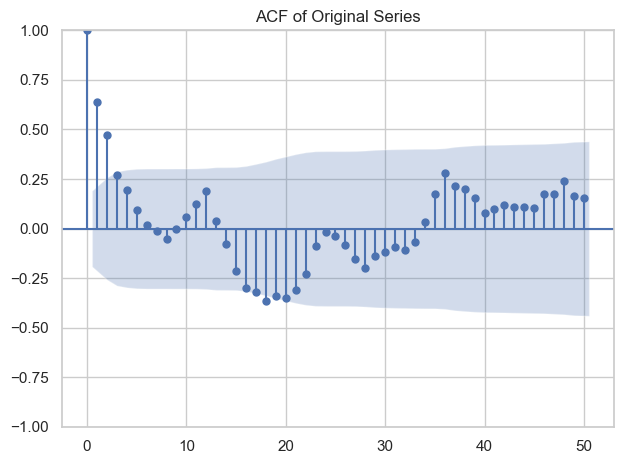


ADF Test on First-Differenced Series:
ADF Statistic: -3.0992251052729682
p-value      : 0.02661058733492149
✅ The differenced series is Stationary


<Figure size 1000x400 with 0 Axes>

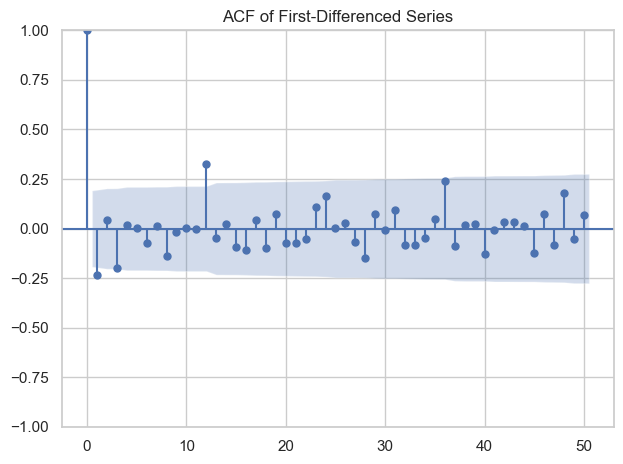


🔍 FINAL CONCLUSION:
❌ Your time series does not exhibit the characteristics of a pure Random Walk.


In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# --- STEP 1: Load your time series ---
series = df['Monthly_Anomaly'].dropna()

# --- STEP 2: Plot original series ---
plt.figure(figsize=(12, 4))
plt.plot(series)
plt.title("Original Time Series")
plt.grid(True)
plt.show()

# --- STEP 3: ADF Test on original series ---
adf_result = adfuller(series)
adf_stat_orig = adf_result[0]
p_val_orig = adf_result[1]

print("ADF Test on Original Series:")
print(f"ADF Statistic: {adf_stat_orig}")
print(f"p-value      : {p_val_orig}")
if p_val_orig > 0.05:
    print("❌ The series is likely Non-Stationary (could be a Random Walk)")
else:
    print("✅ The series is likely Stationary")

# --- STEP 4: Plot ACF of original series ---
plt.figure(figsize=(10, 4))
plot_acf(series, lags=50)
plt.title("ACF of Original Series")
plt.tight_layout()
plt.show()

# --- STEP 5: First differencing ---
diff_series = series.diff().dropna()

# --- STEP 6: ADF Test on differenced series ---
adf_diff_result = adfuller(diff_series)
adf_stat_diff = adf_diff_result[0]
p_val_diff = adf_diff_result[1]

print("\nADF Test on First-Differenced Series:")
print(f"ADF Statistic: {adf_stat_diff}")
print(f"p-value      : {p_val_diff}")
if p_val_diff < 0.05:
    print("✅ The differenced series is Stationary")
else:
    print("❌ The differenced series is still Non-Stationary")

# --- STEP 7: Plot ACF of differenced series ---
plt.figure(figsize=(10, 4))
plot_acf(diff_series, lags=50)
plt.title("ACF of First-Differenced Series")
plt.tight_layout()
plt.show()

# --- FINAL CONCLUSION ---
print("\n🔍 FINAL CONCLUSION:")
if p_val_orig > 0.05 and p_val_diff < 0.05:
    print("✅ Based on ADF tests and visual inspection, your time series is likely a **Random Walk**.")
else:
    print("❌ Your time series does not exhibit the characteristics of a pure Random Walk.")

In [86]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import itertools

warnings.filterwarnings("ignore")

# Assuming your original data is in `df['Temperature']`
y = df['Monthly_Anomaly']

# Define parameter range
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Create all combinations
pdq = list(itertools.product(p, d, q))

# Track best model
best_aic = np.inf
best_order = None
results = []

for order in pdq:
    try:
        model = ARIMA(y, order=order)
        result = model.fit()
        results.append({'order': order, 'aic': result.aic})
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
    except:
        continue

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).sort_values(by='aic')

# Show best model
print("Best ARIMA order:", best_order)
print("Lowest AIC:", best_aic)
results_df.head()

Best ARIMA order: (3, 0, 2)
Lowest AIC: -166.79540150078648


order         aic
26  (3, 0, 2) -166.795402
8   (1, 0, 0) -163.541549
16  (2, 0, 0) -162.477776
9   (1, 0, 1) -162.222317
24  (3, 0, 0) -162.073578

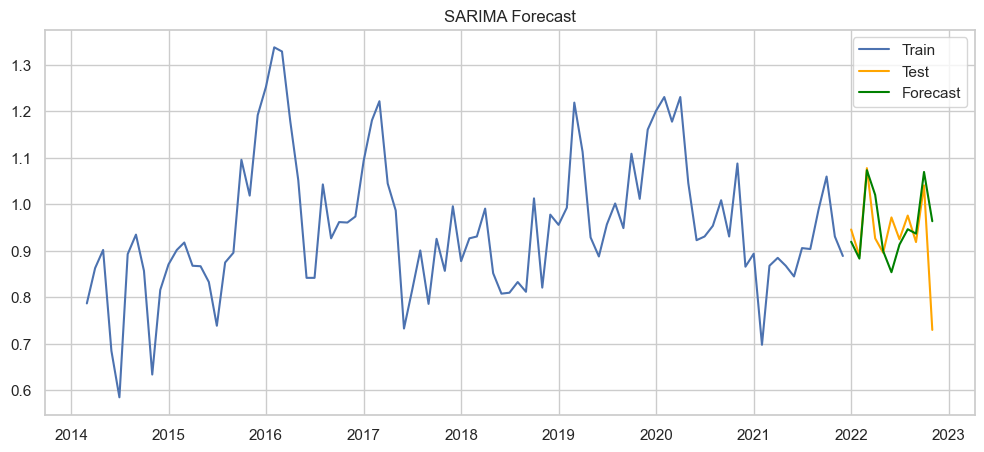

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df

# Step 2: Train-test split (90%-10%)
train_size = int(len(df) * 0.90)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model6 = SARIMAX(train,
                order=(3, 0, 2),
                seasonal_order=(3, 1, 1 , 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

result6 = model6.fit(disp=False)

# Step 4: Forecast
forecast = result6.forecast(steps=len(test))

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

# Ensembling techniques

In [212]:
import pickle

# Step 1: Store all models in a dictionary or list
models = {
    'model1': model2,
    'model2': model3,
    'model3': model4,
    'model4': model5,
    'model5': model6
}

# Step 2: Save to pickle file
with open('time_series_models.pkl', 'wb') as f:
    pickle.dump(models, f)


In [213]:
with open('time_series_models.pkl', 'rb') as f:
    loaded_models = pickle.load(f)

# Access individual models like:
model1 = loaded_models['model1']


In [214]:
print(model1)

In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from datetime import datetime

# === USER INPUTS ===
change_points = [
    "1977-02-01", "1987-02-01",
    "2001-04-01", "2014-08-01"
]  # 5 blocks → 5 models
forecast_start = "2017-01-01"
forecast_end = "2022-11-01"
lambda_param = 0.5

# === STEP 1: Load Time Series ===
# Assuming df already defined outside
# df = pd.read_csv("your_timeseries.csv")  # if needed

# === STEP 2: Load ALL 5 Fitted Models from One Pickle File ===
with open("time_series_models.pkl", "rb") as f:
    model_dict = pickle.load(f)  # model_dict is a dictionary of fitted models

# Ensure order: oldest to newest
models = [model_dict[f"model{i}"] for i in range(1, 6)]  # model2 to model6

# === STEP 3: Make Forecast from Each Model ===
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq="MS")
n_steps = len(forecast_index)
forecasts = []

for model in models:
    forecast = model.forecast(steps=n_steps)  # This works if model is a SARIMAXResultsWrapper
    forecast.index = forecast_index
    forecasts.append(forecast)

# === STEP 4: Apply Exponential Weights (λ = 0.5) ===
N = len(forecasts)
weights = np.exp(-lambda_param * np.arange(N - 1, -1, -1))
weights = weights / weights.sum()

# === STEP 5: Weighted Average Forecast ===
weighted_forecast = sum(w * f for w, f in zip(weights, forecasts))

# === STEP 6: Plotting ===
plt.figure(figsize=(12, 6))
for i, f in enumerate(forecasts):
    plt.plot(f.index, f, label=f"Model {i+2} Forecast", alpha=0.4)

plt.plot(weighted_forecast.index, weighted_forecast, label="Weighted Forecast", color="black", linewidth=2)
plt.title("Ensemble Forecast (Weighted by Recency, λ=0.5)")
plt.xlabel("Date")
plt.ylabel("Forecasted Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


AttributeError: 'SARIMAX' object has no attribute 'forecast'

In [218]:
import pickle
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Example: Suppose 'df' is your time series
df = pd.Series(...)  # Replace with your data
train = df[:-10]     # example training split
n_steps = 10         # number of forecast steps
forecast_index = pd.date_range(start=df.index[-1], periods=n_steps+1, freq='D')[1:]

# STEP 1: Fit 5 different SARIMAX models
model_configs = [
    (1, 1, 1, 0, 0, 0, 0),
    (2, 1, 1, 0, 0, 0, 0),
    (1, 1, 2, 0, 0, 0, 0),
    (2, 1, 2, 0, 0, 0, 0),
    (0, 1, 1, 0, 0, 0, 0)
]

fitted_models = []

for config in model_configs:
    p, d, q, P, D, Q, s = config
    model = SARIMAX(train, order=(p, d, q), seasonal_order=(P, D, Q, s))
    fitted = model.fit(disp=False)
    fitted_models.append(fitted)

# STEP 2: Save models to a pickle file
with open("fitted_models.pkl", "wb") as f:
    pickle.dump(fitted_models, f)

# STEP 3: Load models from pickle file
with open("fitted_models.pkl", "rb") as f:
    models = pickle.load(f)

# STEP 4: Forecast using exponential weights
alpha = 0.5
weights = np.array([alpha ** i for i in range(len(models))])
weights = weights[::-1]  # So most recent model has highest weight
weights = weights / weights.sum()

# STEP 5: Forecast and combine
forecasts = []

for model in models:
    forecast = model.get_forecast(steps=n_steps).predicted_mean
    forecast.index = forecast_index
    forecasts.append(forecast)

# Combine with exponential weights
combined_forecast = sum(w * f for w, f in zip(weights, forecasts))

# Final combined forecast
print("Combined Forecast:")
print(combined_forecast)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from datetime import datetime

# === USER INPUTS ===
# time_series_path = "your_path/time_series.csv"  # Uncomment and set if loading from CSV
change_points = [
    "1977-02-01", "1987-02-01",
    "2001-04-01", "2014-08-01"
]  # These are just given — not used in this script

forecast_start = "2017-01-01"
forecast_end = "2022-11-01"
lambda_param = 0.5

# === STEP 1: Load Time Series ===
# df = pd.read_csv(time_series_path, parse_dates=["Date"], index_col="Date")  # Uncomment if needed
# OR
# df = ...  # You need to load your time series here

# === STEP 2: Load Models ===
# Load all models at once from the single pickle file
with open("time_series_models.pkl", "rb") as f:
    model_dict = pickle.load(f)  # Assuming it’s a dict like {'model1': ..., 'model2': ..., ...}

# Sort keys if needed to ensure order
sorted_keys = sorted(model_dict.keys())  # ['model1', 'model2', ..., 'model5']
models = [model_dict[k] for k in sorted_keys]

# === STEP 3: Make Forecast from Each Model ===
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq="MS")  # Monthly start freq
forecasts = []

for model in models:
    pred = model.forecast(steps=len(forecast_index))
    pred.index = forecast_index
    forecasts.append(pred)

# === STEP 4: Apply Exponential Weights ===
N = len(forecasts)
weights = np.exp(-lambda_param * np.arange(N - 1, -1, -1))
weights = weights / weights.sum()

# === STEP 5: Weighted Average Forecast ===
weighted_forecast = sum(w * f for w, f in zip(weights, forecasts))

# === STEP 6: Plotting ===
plt.figure(figsize=(12, 6))
for i, f in enumerate(forecasts):
    plt.plot(f.index, f, label=f"Model {i+1} Forecast", alpha=0.4)

plt.plot(weighted_forecast.index, weighted_forecast, label="Weighted Forecast", color="black", linewidth=2)
plt.title("Ensemble Forecast (Weighted by Recency)")
plt.xlabel("Date")
plt.ylabel("Forecasted Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


AttributeError: 'SARIMAX' object has no attribute 'forecast'

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from datetime import datetime

# === USER INPUTS ===
change_points = [
    "1977-02-01", "1987-02-01",
    "2001-04-01", "2014-08-01"
]  # Not used in this script directly

forecast_start = "2017-01-01"
forecast_end = "2022-11-01"
lambda_param = 0.5

# === STEP 1: Load Time Series ===
# If needed, load your time series here
# df = pd.read_csv("your_time_series.csv", parse_dates=["Date"], index_col="Date")
# or
# df = ...  # Add this if you're using from existing variable

# === STEP 2: Load Fitted Models ===
# Load all fitted SARIMAXResultsWrapper models from the pickle file
with open("time_series_models.pkl", "rb") as f:
    model_dict = pickle.load(f)  # Assuming saved as a dictionary {'model1': ..., ...}

# Optional: ensure consistent order of models
sorted_keys = sorted(model_dict.keys())  # e.g., ['model1', 'model2', ...]
models = [model_dict[k] for k in sorted_keys]

# === STEP 3: Make Forecast from Each Model ===
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq="MS")  # Monthly Start
forecasts = []

for model in models:
    # Forecast using get_forecast
    pred = model.get_forecast(steps=len(forecast_index)).predicted_mean
    pred.index = forecast_index
    forecasts.append(pred)

# === STEP 4: Apply Exponential Weights ===
N = len(forecasts)
weights = np.exp(-lambda_param * np.arange(N - 1, -1, -1))
weights = weights / weights.sum()

# === STEP 5: Weighted Average Forecast ===
weighted_forecast = sum(w * f for w, f in zip(weights, forecasts))

# === STEP 6: Plotting ===
plt.figure(figsize=(12, 6))
for i, f in enumerate(forecasts):
    plt.plot(f.index, f, label=f"Model {i+1} Forecast", alpha=0.4)

plt.plot(weighted_forecast.index, weighted_forecast, label="Weighted Forecast", color="black", linewidth=2)
plt.title("Ensemble Forecast (Weighted by Recency)")
plt.xlabel("Date")
plt.ylabel("Forecasted Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


AttributeError: 'SARIMAX' object has no attribute 'get_forecast'

In [228]:
import numpy as np
import pandas as pd

# List of your fitted models (order: oldest to most recent)
fitted_models = [model2, model3, model4, model5, model6]

# Forecast horizon
n_steps = 10

# Exponential decay parameter (lambda = 0.5)
lambda_val = 0.5

# Generate weights: newer models have higher weights
num_models = len(fitted_models)
raw_weights = [lambda_val ** (num_models - i - 1) for i in range(num_models)]
normalized_weights = [w / sum(raw_weights) for w in raw_weights]

# Print weights for transparency
for i, w in enumerate(normalized_weights):
    print(f"Weight for model{i+2}: {w:.4f}")

# Get individual model forecasts
forecasts = []
for model in fitted_models:
    # Each model has already been fitted, so just call get_prediction
    forecast = model.get_prediction(start=len(model.data.endog), end=len(model.data.endog) + n_steps - 1)
    forecasts.append(forecast.predicted_mean)

# Combine forecasts using weights
ensemble_forecast = sum(w * f for w, f in zip(normalized_weights, forecasts))

# Display ensemble forecast
ensemble_forecast = ensemble_forecast.reset_index(drop=True)
print("\nEnsemble Forecast:")
print(ensemble_forecast)


Weight for model2: 0.0323
Weight for model3: 0.0645
Weight for model4: 0.1290
Weight for model5: 0.2581
Weight for model6: 0.5161


AttributeError: 'SARIMAX' object has no attribute 'get_prediction'

In [230]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Step 1: Assume 'df' is your time series dataframe with datetime index
# and single column 'value'
data = df['value']
n = len(data)

# Step 2: Define change points (you can use ruptures or other libs)
# For example, assume 5 segments
change_points = [0, int(n*0.2), int(n*0.4), int(n*0.6), int(n*0.8), n]

# Step 3: Create segments
segments = [data[change_points[i]:change_points[i+1]] for i in range(len(change_points)-1)]

# Step 4: Fit SARIMA model on each segment
# Store models and their AICs
models = []
aics = []

for i, seg in enumerate(segments):
    model = SARIMAX(seg, order=(1,1,1), seasonal_order=(0,0,0,0), enforce_stationarity=False, enforce_invertibility=False)
    result = model.fit(disp=False)
    models.append(result)
    aics.append(result.aic)

# Step 5: Compute weights (inverse AIC normalized)
inv_aics = [1/aic for aic in aics]
weights = [w/sum(inv_aics) for w in inv_aics]

# Print weights
for i, w in enumerate(weights):
    print(f"Weight for model{i+1}: {w:.4f}")

# Step 6: Forecast future values from each model (e.g., next 10 steps)
forecast_horizon = 10
forecasts = []

for result in models:
    pred = result.get_forecast(steps=forecast_horizon)
    forecasts.append(pred.predicted_mean.values)

# Step 7: Ensemble forecast
ensemble_forecast = np.zeros(forecast_horizon)

for weight, forecast in zip(weights, forecasts):
    ensemble_forecast += weight * forecast

# Step 8: Plot ensemble forecast
plt.figure(figsize=(10, 4))
plt.plot(data, label='Original')
plt.plot(range(len(data), len(data)+forecast_horizon), ensemble_forecast, label='Ensemble Forecast', marker='o')
plt.legend()
plt.title('Ensemble Forecast from SARIMA Models')
plt.show()


KeyError: 'value'

In [211]:
# === PART 1: FITTING AND SAVING MODELS ===

import pickle
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming you have already split your time series into 5 segments:
# train2, train3, train4, train5, train6


# Save to pickle
models = {
    'model2': model2.fit(),
    'model3': model3.fit(),
    'model4': model4.fit(),
    'model5': model5.fit(),
    'model6': model6.fit()
}

with open('time_series_models.pkl', 'wb') as f:
    pickle.dump(models, f)


KeyboardInterrupt: 

In [210]:
# === PART 2: LOADING, FORECASTING, WEIGHTING, AND PLOTTING ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Load models from pickle
with open('time_series_models.pkl', 'rb') as f:
    model_dict = pickle.load(f)

# Order: oldest to newest
models = [model_dict['model2'], model_dict['model3'], model_dict['model4'],
          model_dict['model5'], model_dict['model6']]

# Forecast parameters
forecast_start = "2017-01-01"
forecast_end = "2022-11-01"
lambda_param = 0.5
forecast_index = pd.date_range(start=forecast_start, end=forecast_end, freq="MS")
n_steps = len(forecast_index)

# Forecast from each model
forecasts = []
for model in models:
    forecast = model.get_forecast(steps=n_steps).predicted_mean
    forecast.index = forecast_index
    forecasts.append(forecast)

# Exponential Weights (newer models get higher weights)
N = len(forecasts)
weights = np.exp(-lambda_param * np.arange(N - 1, -1, -1))  # oldest to newest
weights = weights / weights.sum()

print("Exponential Weights (oldest to newest):", weights)

# Weighted ensemble forecast
weighted_forecast = sum(w * f for w, f in zip(weights, forecasts))

# Plotting
plt.figure(figsize=(12, 6))
for i, forecast in enumerate(forecasts):
    plt.plot(forecast.index, forecast, label=f"Model {i+2} Forecast", alpha=0.4)

plt.plot(weighted_forecast.index, weighted_forecast, label="Weighted Ensemble Forecast", color="black", linewidth=2)
plt.title("Ensemble Forecast with Exponential Weighting (λ=0.5)")
plt.xlabel("Date")
plt.ylabel("Forecasted Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


AttributeError: 'SARIMAX' object has no attribute 'get_forecast'

In [ ]:
Change Point 1: 1936-04-01 00:00:00
Change Point 2: 1977-02-01 00:00:00
Change Point 3: 1987-02-01 00:00:00
Change Point 4: 2001-04-01 00:00:00
Change Point 5: 2014-08-01 00:00:00

In [186]:
pd.read_csv('berkeley_global_temperatures.csv')

Year  Month  Monthly_Anomaly
0     1850      1           -0.753
1     1850      2           -0.202
2     1850      3           -0.367
3     1850      4           -0.596
4     1850      5           -0.619
...    ...    ...              ...
4195  2024      8            1.257
4196  2024      9            1.138
4197  2024     10            1.182
4198  2024     11            1.169
4199  2024     12            1.138

[4200 rows x 3 columns]

# df1

In [66]:
df = df1

In [67]:
df2 = df1[500:]
df = df2

In [73]:
df7 = df[:310]
df8 = df[310:]

In [74]:
df7

Monthly_Anomaly
Date                       
1891-09-01           -0.270
1891-10-01           -0.340
1891-11-01           -0.507
1891-12-01           -0.106
1892-01-01           -0.275
...                     ...
1917-02-01           -0.658
1917-03-01           -0.675
1917-04-01           -0.514
1917-05-01           -0.568
1917-06-01           -0.499

[310 rows x 1 columns]

In [75]:
df8

Monthly_Anomaly
Date                       
1917-07-01           -0.293
1917-08-01           -0.324
1917-09-01           -0.371
1917-10-01           -0.509
1917-11-01           -0.485
...                     ...
1935-08-01           -0.223
1935-09-01           -0.235
1935-10-01           -0.038
1935-11-01           -0.390
1935-12-01           -0.185

[222 rows x 1 columns]

# df7

In [76]:
df = df7

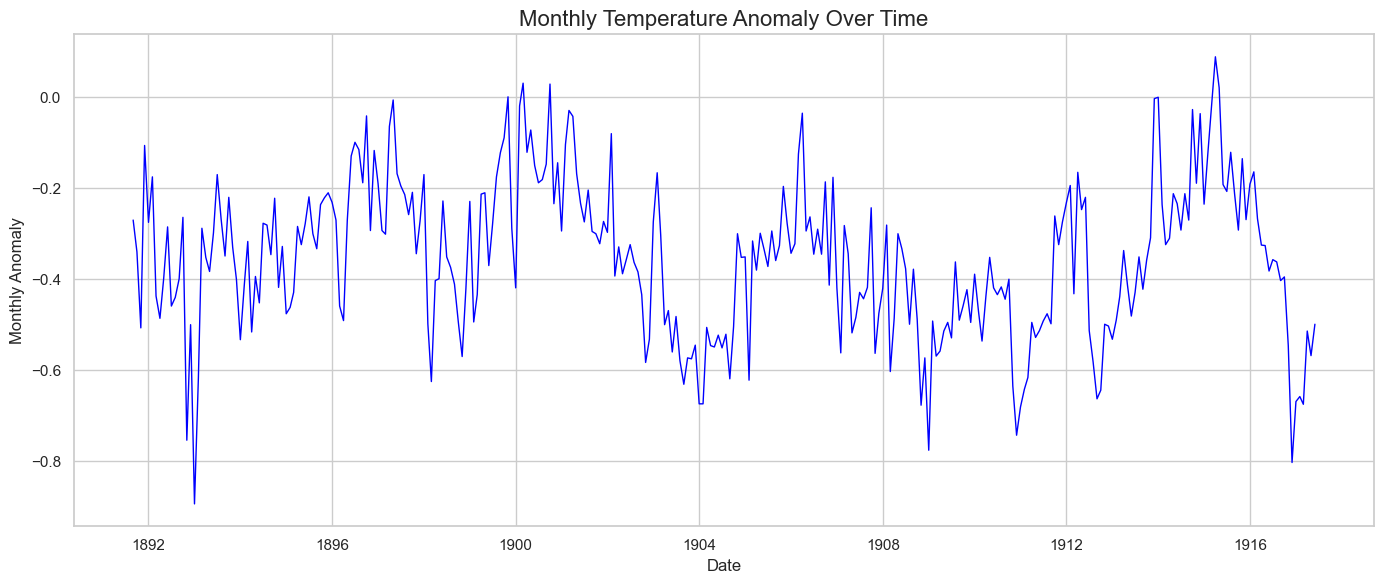

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plot the time series
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Monthly_Anomaly'], color='blue', linewidth=1)
plt.title("Monthly Temperature Anomaly Over Time", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Monthly Anomaly", fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


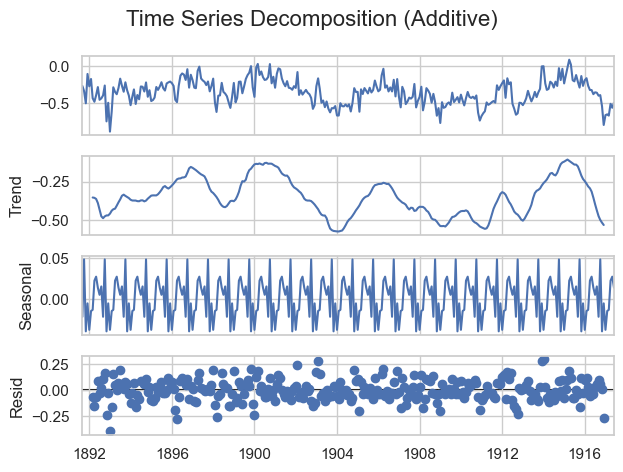

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
result = seasonal_decompose(df, model='additive', period=12)  # period=12 for monthly data (1 year)

# Plot the decomposition
result.plot()
plt.suptitle('Time Series Decomposition (Additive)', fontsize=16)
plt.tight_layout()
plt.show()

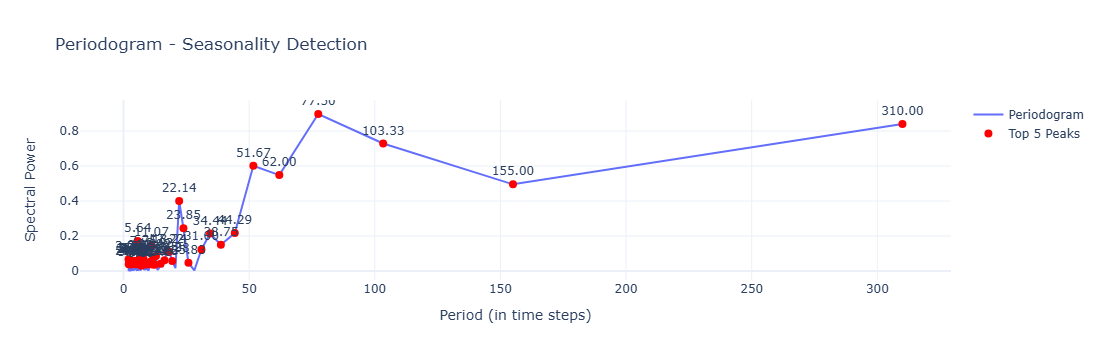

Top 5 Seasonality Periods (in time steps):
         Period     Power
3     77.500000  0.897286
0    310.000000  0.840231
2    103.333333  0.728698
5     51.666667  0.601867
4     62.000000  0.548301
1    155.000000  0.495382
13    22.142857  0.400420
12    23.846154  0.244210
6     44.285714  0.217227
8     34.444444  0.214365
54     5.636364  0.171852
7     38.750000  0.150095
27    11.071429  0.146208
9     31.000000  0.123185
17    17.222222  0.111547
16    18.235294  0.110952
39     7.750000  0.100139
23    12.916667  0.086436
25    11.923077  0.079474
46     6.595745  0.075259
38     7.948718  0.069711
43     7.045455  0.067846
154    2.000000  0.067253
18    16.315789  0.061083
74     4.133333  0.059115
55     5.535714  0.058480
81     3.780488  0.057767
15    19.375000  0.057622
106    2.897196  0.056669
128    2.403101  0.052594
28    10.689655  0.052498
88     3.483146  0.049972
80     3.827160  0.049427
64     4.769231  0.047728
11    25.833333  0.047576
67     4.558824  0.04

In [79]:
import numpy as np
import pandas as pd
from scipy.signal import periodogram
import plotly.graph_objects as go

# ----- Replace this with your time series -----
# Assume your monthly time series is in a Pandas Series called `series`
series = df['Monthly_Anomaly']
series = series.dropna().values  # ensure no NaNs

# ----- Step 1: Compute periodogram -----
frequencies, power = periodogram(series)

# ----- Step 2: Convert frequency to period -----
nonzero_indices = frequencies > 0  # avoid division by zero
frequencies = frequencies[nonzero_indices]
power = power[nonzero_indices]
periods = 1 / frequencies

# ----- Step 3: Create a dataframe to find top periods -----
df_periods = pd.DataFrame({'Period': periods, 'Power': power})
df_top = df_periods.sort_values(by='Power', ascending=False).head(50)

# ----- Step 4: Plot with Plotly -----
fig = go.Figure()

fig.add_trace(go.Scatter(x=periods, y=power,
                         mode='lines',
                         name='Periodogram'))

# Mark top 5 seasonal periods
fig.add_trace(go.Scatter(x=df_top['Period'], y=df_top['Power'],
                         mode='markers+text',
                         text=[f"{p:.2f}" for p in df_top['Period']],
                         textposition='top center',
                         marker=dict(color='red', size=8),
                         name='Top 5 Peaks'))

fig.update_layout(title='Periodogram - Seasonality Detection',
                  xaxis_title='Period (in time steps)',
                  yaxis_title='Spectral Power',
                  template='plotly_white')

fig.show()

# ----- Step 5: Print top 5 periods -----
print("Top 5 Seasonality Periods (in time steps):")
print(df_top[['Period', 'Power']])

In [80]:
from statsmodels.tsa.stattools import adfuller

# Suppose your series is called 'Monthly_Anomaly'
# Replace with your actual pandas Series name
result = adfuller(df['Monthly_Anomaly'].dropna())

# Extracting results
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

# Printing results
print("Augmented Dickey-Fuller Test Results:")
print(f"ADF Statistic      : {adf_statistic}")
print(f"p-value            : {p_value}")
print(f"Number of lags     : {used_lag}")
print(f"Number of obs used : {n_obs}")
print("Critical Values    :")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Stationarity decision
if p_value < 0.05:
    print("\n✅ The series is likely **stationary** (reject null hypothesis).")
else:
    print("\n❌ The series is likely **non-stationary** (fail to reject null hypothesis).")


Augmented Dickey-Fuller Test Results:
ADF Statistic      : -3.856509885068507
p-value            : 0.002379274579715476
Number of lags     : 3
Number of obs used : 306
Critical Values    :
   1%: -3.4519023023726696
   5%: -2.8710320399170537
   10%: -2.57182745012602

✅ The series is likely **stationary** (reject null hypothesis).


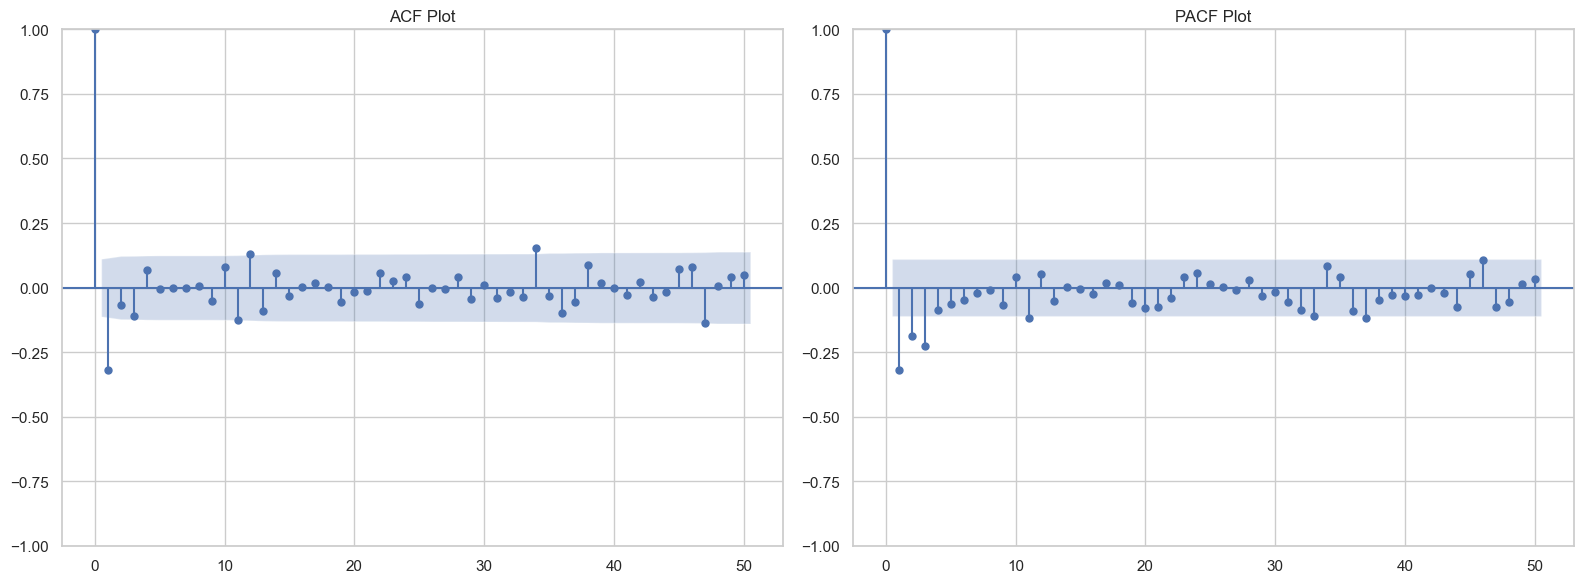

In [81]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Use the original or differenced series
series = df['Monthly_Anomaly'].diff().dropna()  # Use differenced if original was non-stationary

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

plot_acf(series, ax=axes[0], lags=50, title='ACF Plot')
plot_pacf(series, ax=axes[1], lags=50, title='PACF Plot', method='ywm')

plt.tight_layout()
plt.show()

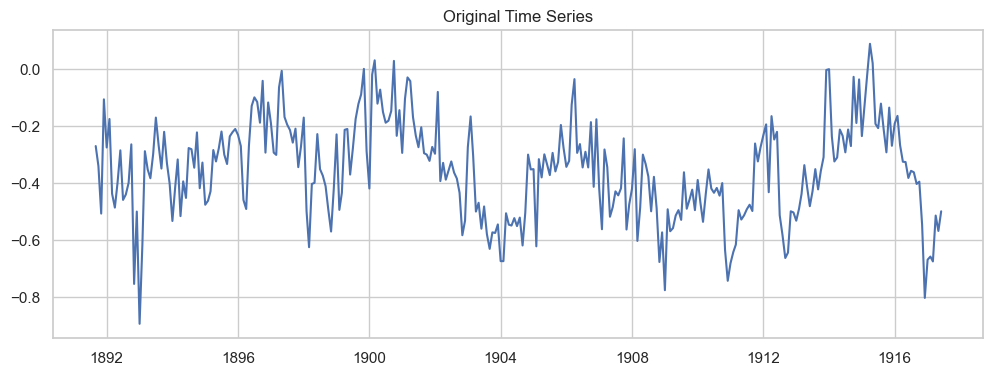

ADF Test on Original Series:
ADF Statistic: -3.856509885068507
p-value      : 0.002379274579715476
✅ The series is likely Stationary


<Figure size 1000x400 with 0 Axes>

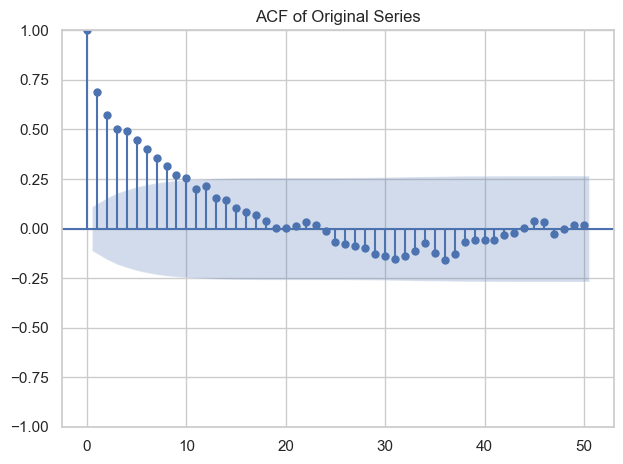


ADF Test on First-Differenced Series:
ADF Statistic: -12.466843309879309
p-value      : 3.3111023917083745e-23
✅ The differenced series is Stationary


<Figure size 1000x400 with 0 Axes>

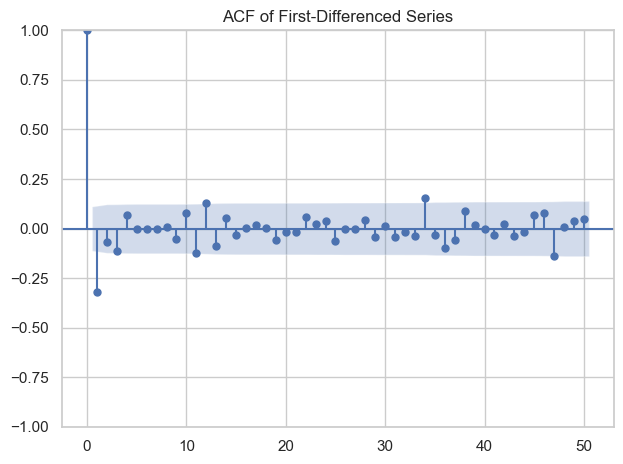


🔍 FINAL CONCLUSION:
❌ Your time series does not exhibit the characteristics of a pure Random Walk.


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

# --- STEP 1: Load your time series ---
series = df['Monthly_Anomaly'].dropna()

# --- STEP 2: Plot original series ---
plt.figure(figsize=(12, 4))
plt.plot(series)
plt.title("Original Time Series")
plt.grid(True)
plt.show()

# --- STEP 3: ADF Test on original series ---
adf_result = adfuller(series)
adf_stat_orig = adf_result[0]
p_val_orig = adf_result[1]

print("ADF Test on Original Series:")
print(f"ADF Statistic: {adf_stat_orig}")
print(f"p-value      : {p_val_orig}")
if p_val_orig > 0.05:
    print("❌ The series is likely Non-Stationary (could be a Random Walk)")
else:
    print("✅ The series is likely Stationary")

# --- STEP 4: Plot ACF of original series ---
plt.figure(figsize=(10, 4))
plot_acf(series, lags=50)
plt.title("ACF of Original Series")
plt.tight_layout()
plt.show()

# --- STEP 5: First differencing ---
diff_series = series.diff().dropna()

# --- STEP 6: ADF Test on differenced series ---
adf_diff_result = adfuller(diff_series)
adf_stat_diff = adf_diff_result[0]
p_val_diff = adf_diff_result[1]

print("\nADF Test on First-Differenced Series:")
print(f"ADF Statistic: {adf_stat_diff}")
print(f"p-value      : {p_val_diff}")
if p_val_diff < 0.05:
    print("✅ The differenced series is Stationary")
else:
    print("❌ The differenced series is still Non-Stationary")

# --- STEP 7: Plot ACF of differenced series ---
plt.figure(figsize=(10, 4))
plot_acf(diff_series, lags=50)
plt.title("ACF of First-Differenced Series")
plt.tight_layout()
plt.show()

# --- FINAL CONCLUSION ---
print("\n🔍 FINAL CONCLUSION:")
if p_val_orig > 0.05 and p_val_diff < 0.05:
    print("✅ Based on ADF tests and visual inspection, your time series is likely a **Random Walk**.")
else:
    print("❌ Your time series does not exhibit the characteristics of a pure Random Walk.")

In [83]:
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import itertools

warnings.filterwarnings("ignore")

# Assuming your original data is in `df['Temperature']`
y = df['Monthly_Anomaly']

# Define parameter range
p = range(0, 4)
d = range(0, 2)
q = range(0, 4)

# Create all combinations
pdq = list(itertools.product(p, d, q))

# Track best model
best_aic = np.inf
best_order = None
results = []

for order in pdq:
    try:
        model = ARIMA(y, order=order)
        result = model.fit()
        results.append({'order': order, 'aic': result.aic})
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = order
    except:
        continue

# Convert results to DataFrame for easy viewing
results_df = pd.DataFrame(results).sort_values(by='aic')

# Show best model
print("Best ARIMA order:", best_order)
print("Lowest AIC:", best_aic)
results_df.head()

Best ARIMA order: (2, 0, 1)
Lowest AIC: -427.1906903137774


order         aic
17  (2, 0, 1) -427.190690
19  (2, 0, 3) -427.175138
10  (1, 0, 2) -427.029160
9   (1, 0, 1) -425.857392
11  (1, 0, 3) -425.700992

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df

# Step 2: Train-test split (90%-10%)
train_size = int(len(df) * 0.90)
train = data.iloc[:train_size]
test = data.iloc[train_size:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model = SARIMAX(train,
                order=(1, 0, 3),
                seasonal_order=(3, 2, 1 , 24),
                enforce_stationarity=False,
                enforce_invertibility=False)

results = model.fit(disp=False)

# Step 4: Forecast
forecast = results.forecast(steps=len(test))

# Step 5: Plot
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

KeyboardInterrupt: 

# Ensemble Technique

Weight for model2: 0.0463
Weight for model3: 0.1082
Weight for model4: 0.2532
Weight for model5: 0.5924


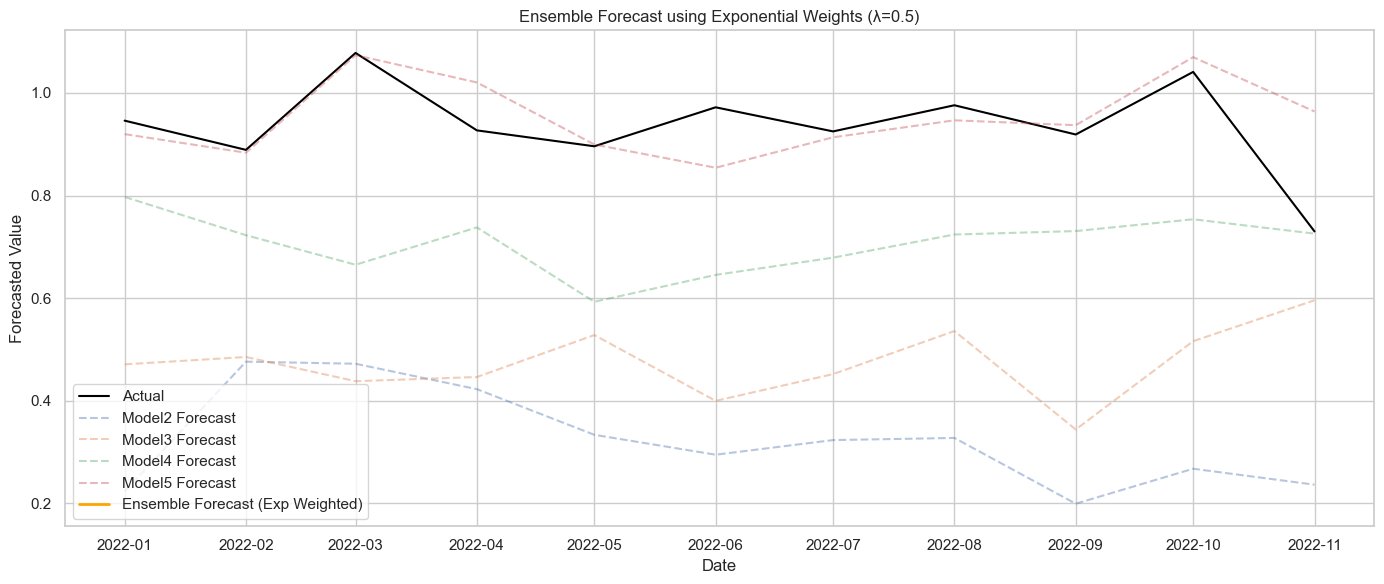

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# === Step 1: Forecast horizon
forecast_horizon = len(test)

# === Step 2: Get forecasts from all 5 models
#forecast2 = result2.forecast(steps=forecast_horizon)
forecast3 = result3.forecast(steps=forecast_horizon)
forecast4 = result4.forecast(steps=forecast_horizon)
forecast5 = result5.forecast(steps=forecast_horizon)
forecast6 = result6.forecast(steps=forecast_horizon)

# === Step 3: Put forecasts into a list (oldest to newest)
all_forecasts = [forecast3, forecast4, forecast5,forecast6]

# === Step 4: Exponential weights with lambda = 0.5
lambda_param = 0.85
N = len(all_forecasts)

weights = np.exp(-lambda_param * np.arange(N - 1, -1, -1))  # Newest gets highest weight
weights = weights / weights.sum()  # Normalize

# === Print weights
for i, w in enumerate(weights, start=2):
    print(f"Weight for model{i}: {w:.4f}")

# === Step 5: Ensemble forecast
ensemble_forecast = np.zeros(forecast_horizon)

for forecast, weight in zip(all_forecasts, weights):
    ensemble_forecast += weight * forecast

# === Step 6: Plot all individual forecasts + ensemble
plt.figure(figsize=(14, 6))
plt.plot(test.index, test, label='Actual', color='black')
colors = ['blue', 'green', 'red', 'purple', 'brown']

for i, forecast in enumerate(all_forecasts, start=2):
    plt.plot(test.index, forecast, label=f'Model{i} Forecast', alpha=0.4, linestyle='--')

plt.plot(test.index, ensemble_forecast, label='Ensemble Forecast (Exp Weighted)', color='orange', linewidth=2)
plt.title('Ensemble Forecast using Exponential Weights (λ=0.5)')
plt.xlabel('Date')
plt.ylabel('Forecasted Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [155]:
n_steps = 10  # Number of steps to forecast (you can change this)

# Forecasts from each model
fc2 = model2.forecast(steps=n_steps)
fc3 = model3.forecast(steps=n_steps)
fc4 = model4.forecast(steps=n_steps)
fc5 = model5.forecast(steps=n_steps)
fc6 = model6.forecast(steps=n_steps)

# Apply weights to each forecast
ensemble_forecast = (
    0.0323 * fc2 +
    0.0645 * fc3 +
    0.1290 * fc4 +
    0.2581 * fc5 +
    0.5161 * fc6
)

# Plotting the ensemble forecast
import matplotlib.pyplot as plt

plt.plot(ensemble_forecast, label='Ensemble Forecast')
plt.title("Ensemble Forecast (Weighted)")
plt.xlabel("Time Steps")
plt.ylabel("Forecasted Values")
plt.legend()
plt.show()


AttributeError: 'SARIMAX' object has no attribute 'forecast'

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df2

# Step 2: Train-test split (90%-10%)
train_size = int(len(df2))
train = df0.iloc[1032:1530]
test = df0.iloc[1530:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model2 = SARIMAX(train,
                order=(2, 0, 1),
                seasonal_order=(5, 4, 2 , 9),
                enforce_stationarity=False,
                enforce_invertibility=False)

result2 = model2.fit(disp=False)

# Step 4: Forecast
forecast2 = result2.forecast(steps=len(test))

In [102]:
forecast2

1977-07-01       0.058571
1977-08-01       0.123601
1977-09-01       0.235864
1977-10-01       0.521674
1977-11-01       0.295596
                 ...     
2022-07-01     339.226332
2022-08-01     174.684889
2022-09-01     962.793348
2022-10-01    1430.869131
2022-11-01    1688.734548
Freq: MS, Name: predicted_mean, Length: 545, dtype: float64

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df3

# Step 2: Train-test split (90%-10%)
train_size = int(len(df))
train = df0.iloc[1530:1655]
test = df0.iloc[1655:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model3 = SARIMAX(train,
                order=(3, 0, 3),
                seasonal_order=(3, 1, 2 , 18),
                enforce_stationarity=False,
                enforce_invertibility=False)

result3 = model3.fit(disp=False)

# Step 4: Forecast
forecast3 = result3.forecast(steps=len(test))


In [91]:
forecast3.shape

(420,)

In [92]:
forecast3

1987-12-01    0.436887
1988-01-01    0.152945
1988-02-01    0.193157
1988-03-01    0.018594
1988-04-01    0.125444
                ...   
2022-07-01    0.189744
2022-08-01    0.188874
2022-09-01    0.168305
2022-10-01    0.150641
2022-11-01    0.188117
Freq: MS, Name: predicted_mean, Length: 420, dtype: float64

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df4

# Step 2: Train-test split (90%-10%)
train_size = int(len(df))
train = df0.iloc[1655:1820]
test = df0.iloc[1820:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model4 = SARIMAX(train,
                order=(3, 0, 1),
                seasonal_order=(1, 1, 2 , 41),
                enforce_stationarity=False,
                enforce_invertibility=False)

result4 = model4.fit(disp=False)

# Step 4: Forecast
forecast4 = result4.forecast(steps=len(test))


In [94]:
forecast4

2001-09-01    0.632886
2001-10-01    0.637198
2001-11-01    0.693566
2001-12-01    0.792450
2002-01-01    0.630737
                ...   
2022-07-01    0.681558
2022-08-01    0.598633
2022-09-01    0.535927
2022-10-01    0.596939
2022-11-01    0.670355
Freq: MS, Name: predicted_mean, Length: 255, dtype: float64

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df5

# Step 2: Train-test split (90%-10%)
train_size = int(len(df))
train = df0.iloc[1820:1970]
test = df0.iloc[1970:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model5 = SARIMAX(train,
                order=(2, 0, 0),
                seasonal_order=(1, 1, 1 , 50),
                enforce_stationarity=False,
                enforce_invertibility=False)

result5 = model5.fit(disp=False)

# Step 4: Forecast
forecast5 = result5.forecast(steps=len(test))


In [96]:
forecast5

2014-03-01    0.621869
2014-04-01    0.701007
2014-05-01    0.676053
2014-06-01    0.816358
2014-07-01    0.728841
                ...   
2022-07-01    0.709105
2022-08-01    0.770233
2022-09-01    0.744837
2022-10-01    0.860535
2022-11-01    0.752309
Freq: MS, Name: predicted_mean, Length: 105, dtype: float64

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Step 1: Prepare datetime index and data
data = df6

# Step 2: Train-test split (90%-10%)
train_size = int(len(df))
train = df0.iloc[1970:2040]
test = df0.iloc[2040:]

# Step 3: Fit SARIMA model (SARIMAX with only endog → pure SARIMA)
model6 = SARIMAX(train,
                order=(3, 0, 2),
                seasonal_order=(3, 1, 1 , 12),
                enforce_stationarity=False,
                enforce_invertibility=False)

result6 = model6.fit(disp=False)

# Step 4: Forecast
forecast6 = result6.forecast(steps=len(test))

In [110]:
#

In [111]:
forecast6

2020-01-01    1.130704
2020-02-01    1.205452
2020-03-01    1.371609
2020-04-01    1.217883
2020-05-01    1.068622
2020-06-01    0.920537
2020-07-01    1.006791
2020-08-01    1.097390
2020-09-01    1.009552
2020-10-01    1.115682
2020-11-01    1.054764
2020-12-01    1.188645
2021-01-01    1.132164
2021-02-01    1.199554
2021-03-01    1.269341
2021-04-01    1.194592
2021-05-01    1.066205
2021-06-01    0.939139
2021-07-01    0.984943
2021-08-01    1.038381
2021-09-01    0.970297
2021-10-01    1.125753
2021-11-01    1.002984
2021-12-01    1.145818
2022-01-01    1.086565
2022-02-01    1.134774
2022-03-01    1.257425
2022-04-01    1.193723
2022-05-01    1.035191
2022-06-01    0.959039
2022-07-01    1.004582
2022-08-01    1.048455
2022-09-01    0.994032
2022-10-01    1.155159
2022-11-01    1.029283
Freq: MS, Name: predicted_mean, dtype: float64

In [112]:
forecast6.shape

(35,)

In [113]:
fore2 = forecast2.tail(35)
fore2

NameError: name 'forecast2' is not defined

In [114]:
fore3 = forecast3.tail(35)
fore4 = forecast4.tail(35)
fore5 = forecast5.tail(35)


In [115]:
fore6 = forecast6.tail(35)

In [116]:
fore5

2020-01-01    0.628028
2020-02-01    0.638099
2020-03-01    0.589863
2020-04-01    0.647276
2020-05-01    0.559472
2020-06-01    0.558267
2020-07-01    0.437489
2020-08-01    0.608371
2020-09-01    0.747018
2020-10-01    0.666581
2020-11-01    0.585796
2020-12-01    0.643824
2021-01-01    0.654064
2021-02-01    0.650547
2021-03-01    0.692484
2021-04-01    0.640162
2021-05-01    0.694933
2021-06-01    0.613587
2021-07-01    0.704130
2021-08-01    0.614712
2021-09-01    0.629867
2021-10-01    0.676581
2021-11-01    0.648445
2021-12-01    0.724177
2022-01-01    0.780170
2022-02-01    0.722199
2022-03-01    0.772473
2022-04-01    0.721804
2022-05-01    0.782438
2022-06-01    0.696386
2022-07-01    0.709105
2022-08-01    0.770233
2022-09-01    0.744837
2022-10-01    0.860535
2022-11-01    0.752309
Freq: MS, Name: predicted_mean, dtype: float64

In [117]:
# Weight for model2: 0.0363
# Weight for model3: 0.0938
# Weight for model4: 0.2426
# Weight for model5: 0.6273

In [179]:
forecast = 0.0363*fore3 +  0.0938*fore4 + 0.2426*fore5 + 0.6273*fore6

In [180]:
# forecast = fore5

In [181]:
real_value = df0.tail(35)
real_value

Monthly_Anomaly
Date                       
2020-01-01            1.201
2020-02-01            1.231
2020-03-01            1.178
2020-04-01            1.231
2020-05-01            1.046
2020-06-01            0.923
2020-07-01            0.931
2020-08-01            0.954
2020-09-01            1.009
2020-10-01            0.931
2020-11-01            1.088
2020-12-01            0.866
2021-01-01            0.894
2021-02-01            0.698
2021-03-01            0.868
2021-04-01            0.885
2021-05-01            0.868
2021-06-01            0.845
2021-07-01            0.906
2021-08-01            0.904
2021-09-01            0.989
2021-10-01            1.060
2021-11-01            0.931
2021-12-01            0.889
2022-01-01            0.946
2022-02-01            0.889
2022-03-01            1.078
2022-04-01            0.927
2022-05-01            0.896
2022-06-01            0.972
2022-07-01            0.925
2022-08-01            0.976
2022-09-01            0.919
2022-10-01            1.041
2022-11-01            0.730

In [182]:
forecast.tail(35)

2020-01-01    0.913852
2020-02-01    0.957224
2020-03-01    1.054406
2020-04-01    0.968478
2020-05-01    0.854802
2020-06-01    0.771886
2020-07-01    0.795018
2020-08-01    0.895898
2020-09-01    0.869107
2020-10-01    0.923618
2020-11-01    0.857560
2020-12-01    0.952429
2021-01-01    0.917014
2021-02-01    0.967753
2021-03-01    1.014491
2021-04-01    0.947413
2021-05-01    0.890382
2021-06-01    0.780045
2021-07-01    0.846088
2021-08-01    0.861520
2021-09-01    0.830329
2021-10-01    0.939854
2021-11-01    0.852449
2021-12-01    0.960120
2022-01-01    0.947101
2022-02-01    0.955289
2022-03-01    1.052351
2022-04-01    0.997975
2022-05-01    0.916857
2022-06-01    0.853370
2022-07-01    0.873021
2022-08-01    0.907563
2022-09-01    0.860633
2022-10-01    0.994858
2022-11-01    0.897887
Freq: MS, Name: predicted_mean, dtype: float64

In [183]:
sarthak = pd.DataFrame( forecast)
sarthak

predicted_mean
2020-01-01        0.913852
2020-02-01        0.957224
2020-03-01        1.054406
2020-04-01        0.968478
2020-05-01        0.854802
2020-06-01        0.771886
2020-07-01        0.795018
2020-08-01        0.895898
2020-09-01        0.869107
2020-10-01        0.923618
2020-11-01        0.857560
2020-12-01        0.952429
2021-01-01        0.917014
2021-02-01        0.967753
2021-03-01        1.014491
2021-04-01        0.947413
2021-05-01        0.890382
2021-06-01        0.780045
2021-07-01        0.846088
2021-08-01        0.861520
2021-09-01        0.830329
2021-10-01        0.939854
2021-11-01        0.852449
2021-12-01        0.960120
2022-01-01        0.947101
2022-02-01        0.955289
2022-03-01        1.052351
2022-04-01        0.997975
2022-05-01        0.916857
2022-06-01        0.853370
2022-07-01        0.873021
2022-08-01        0.907563
2022-09-01        0.860633
2022-10-01        0.994858
2022-11-01        0.897887

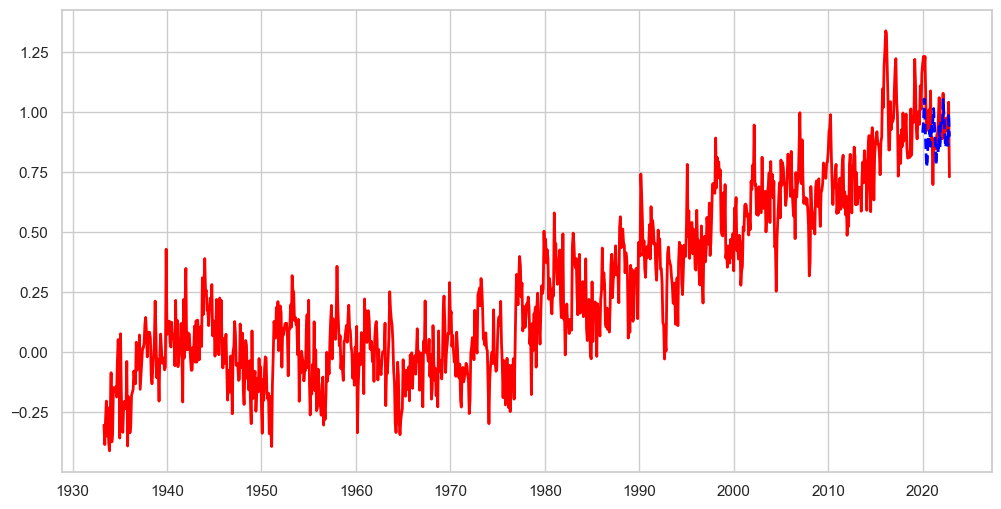

In [184]:
import matplotlib.pyplot as plt



# Plot
plt.figure(figsize=(12, 6))
plt.plot(df0[1000:], label='Actual Data', color='red', linewidth=2)
plt.plot(forecast, label='Forecast', color='blue', linestyle='--', linewidth=2)



In [185]:
import pandas as pd

# Concatenate df1 and df2 along columns using index
result = pd.concat([real_value,sarthak], axis=1)

# Display the result
result


Monthly_Anomaly  predicted_mean
2020-01-01            1.201        0.913852
2020-02-01            1.231        0.957224
2020-03-01            1.178        1.054406
2020-04-01            1.231        0.968478
2020-05-01            1.046        0.854802
2020-06-01            0.923        0.771886
2020-07-01            0.931        0.795018
2020-08-01            0.954        0.895898
2020-09-01            1.009        0.869107
2020-10-01            0.931        0.923618
2020-11-01            1.088        0.857560
2020-12-01            0.866        0.952429
2021-01-01            0.894        0.917014
2021-02-01            0.698        0.967753
2021-03-01            0.868        1.014491
2021-04-01            0.885        0.947413
2021-05-01            0.868        0.890382
2021-06-01            0.845        0.780045
2021-07-01            0.906        0.846088
2021-08-01            0.904        0.861520
2021-09-01            0.989        0.830329
2021-10-01            1.060        0.939854
2021-11-01            0.931        0.852449
2021-12-01            0.889        0.960120
2022-01-01            0.946        0.947101
2022-02-01            0.889        0.955289
2022-03-01            1.078        1.052351
2022-04-01            0.927        0.997975
2022-05-01            0.896        0.916857
2022-06-01            0.972        0.853370
2022-07-01            0.925        0.873021
2022-08-01            0.976        0.907563
2022-09-01            0.919        0.860633
2022-10-01            1.041        0.994858
2022-11-01            0.730        0.897887

In [186]:
result['mse'] = (result['predicted_mean'] - result['Monthly_Anomaly'])**2
result

Monthly_Anomaly  predicted_mean       mse
2020-01-01            1.201        0.913852  0.082454
2020-02-01            1.231        0.957224  0.074953
2020-03-01            1.178        1.054406  0.015276
2020-04-01            1.231        0.968478  0.068918
2020-05-01            1.046        0.854802  0.036557
2020-06-01            0.923        0.771886  0.022835
2020-07-01            0.931        0.795018  0.018491
2020-08-01            0.954        0.895898  0.003376
2020-09-01            1.009        0.869107  0.019570
2020-10-01            0.931        0.923618  0.000054
2020-11-01            1.088        0.857560  0.053103
2020-12-01            0.866        0.952429  0.007470
2021-01-01            0.894        0.917014  0.000530
2021-02-01            0.698        0.967753  0.072767
2021-03-01            0.868        1.014491  0.021459
2021-04-01            0.885        0.947413  0.003895
2021-05-01            0.868        0.890382  0.000501
2021-06-01            0.845        0.780045  0.004219
2021-07-01            0.906        0.846088  0.003590
2021-08-01            0.904        0.861520  0.001805
2021-09-01            0.989        0.830329  0.025176
2021-10-01            1.060        0.939854  0.014435
2021-11-01            0.931        0.852449  0.006170
2021-12-01            0.889        0.960120  0.005058
2022-01-01            0.946        0.947101  0.000001
2022-02-01            0.889        0.955289  0.004394
2022-03-01            1.078        1.052351  0.000658
2022-04-01            0.927        0.997975  0.005037
2022-05-01            0.896        0.916857  0.000435
2022-06-01            0.972        0.853370  0.014073
2022-07-01            0.925        0.873021  0.002702
2022-08-01            0.976        0.907563  0.004684
2022-09-01            0.919        0.860633  0.003407
2022-10-01            1.041        0.994858  0.002129
2022-11-01            0.730        0.897887  0.028186

In [187]:
mse = sum(result['mse'])/35
mse

0.017953389727217616

In [188]:
result['mae'] = abs(result['Monthly_Anomaly'] - result['predicted_mean'])
result

Monthly_Anomaly  predicted_mean       mse       mae
2020-01-01            1.201        0.913852  0.082454  0.287148
2020-02-01            1.231        0.957224  0.074953  0.273776
2020-03-01            1.178        1.054406  0.015276  0.123594
2020-04-01            1.231        0.968478  0.068918  0.262522
2020-05-01            1.046        0.854802  0.036557  0.191198
2020-06-01            0.923        0.771886  0.022835  0.151114
2020-07-01            0.931        0.795018  0.018491  0.135982
2020-08-01            0.954        0.895898  0.003376  0.058102
2020-09-01            1.009        0.869107  0.019570  0.139893
2020-10-01            0.931        0.923618  0.000054  0.007382
2020-11-01            1.088        0.857560  0.053103  0.230440
2020-12-01            0.866        0.952429  0.007470  0.086429
2021-01-01            0.894        0.917014  0.000530  0.023014
2021-02-01            0.698        0.967753  0.072767  0.269753
2021-03-01            0.868        1.014491  0.021459  0.146491
2021-04-01            0.885        0.947413  0.003895  0.062413
2021-05-01            0.868        0.890382  0.000501  0.022382
2021-06-01            0.845        0.780045  0.004219  0.064955
2021-07-01            0.906        0.846088  0.003590  0.059912
2021-08-01            0.904        0.861520  0.001805  0.042480
2021-09-01            0.989        0.830329  0.025176  0.158671
2021-10-01            1.060        0.939854  0.014435  0.120146
2021-11-01            0.931        0.852449  0.006170  0.078551
2021-12-01            0.889        0.960120  0.005058  0.071120
2022-01-01            0.946        0.947101  0.000001  0.001101
2022-02-01            0.889        0.955289  0.004394  0.066289
2022-03-01            1.078        1.052351  0.000658  0.025649
2022-04-01            0.927        0.997975  0.005037  0.070975
2022-05-01            0.896        0.916857  0.000435  0.020857
2022-06-01            0.972        0.853370  0.014073  0.118630
2022-07-01            0.925        0.873021  0.002702  0.051979
2022-08-01            0.976        0.907563  0.004684  0.068437
2022-09-01            0.919        0.860633  0.003407  0.058367
2022-10-01            1.041        0.994858  0.002129  0.046142
2022-11-01            0.730        0.897887  0.028186  0.167887

In [189]:
mae = sum(result['mae'])/35
mae

0.10753666168606123

In [190]:
rel_mae = (mae/sum(result['Monthly_Anomaly']))
rel_mae*100

0.3198116332670966

In [191]:
import pandas as pd
from sklearn.metrics import mean_absolute_error

# Suppose your time series is in a DataFrame 'df' with a column named 'value'
# Example: df = pd.DataFrame({'value': [100, 102, 101, 105, 107]})
df = df0.tail(35)
# Step 1: Create naive forecast (shift values by 1 time step)
df['naive_forecast'] = df['Monthly_Anomaly'].shift(1)

# Step 2: Drop the first row (as it has NaN in naive forecast)
df = df.dropna()

# Step 3: Calculate MAE
mae_naive = mean_absolute_error(df['Monthly_Anomaly'], df['naive_forecast'])

# Step 4: Calculate Relative MAE (as a percentage)
relative_mae_naive = (mae_naive / df['Monthly_Anomaly'].mean()) * 100

# Step 5: Print results
print(f"Naive Forecast MAE: {mae_naive:.4f}")
print(f"Relative MAE (%): {relative_mae_naive:.2f}%")


Naive Forecast MAE: 0.0876
Relative MAE (%): 9.18%


In [192]:
from sklearn.metrics import mean_absolute_error

# Example: If you have these as pandas Series
# y_true = pd.Series([...])      # actual values
# y_pred = pd.Series([...])      # model predictions
y_true = result['Monthly_Anomaly']
y_pred = result['predicted_mean']
# Step 1: Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

# Step 2: Calculate Relative MAE (as a percentage)
relative_mae = (mae / y_true.mean()) * 100

# Step 3: Print results
print(f"Model MAE: {mae:.4f}")
print(f"Relative MAE: {relative_mae:.2f}%")


Model MAE: 0.1075
Relative MAE: 11.19%
